Submitted by Navjiwan Hira

 CASE STUDY NO:1
 SANTANDER CUSTOMER SATISFACTION

# About Santander Customer Satisfaction Problem:-
Santander Customer Satisfaction – Which customers are happy customers?” is a Featured Prediction Competition hosted by Kaggle 
in 2016 on the behalf of “Banco Santander” Bank, which is a large Corporation focusing primarily on the market in  the 
north-eastern part of United States.Kaggle introduces the problem to its readers by harping on the significance of “customer satisfaction” as the key measure of a business success. They further impinge upon the fact that unhappy customers rarely express their dis-satisfaction before leaving. Therefore, it is expected of the participants in the Competition to help identify dis-satisfied customers early on in the relationship so that proactive steps can be taken to improve customer satisfaction early on.The data shared by Santander Bank constitutes of Train-set with 76020 observations, 370 features and one binary target,
a Test-set with 75818 observations and 370 features and also a sample submission file. The data consists of hundreds of 
anonymized features, which are to be leveraged effectively to find an appropriate model and consequently enable prediction 
with respect to a client’s satisfaction/dis-satisfaction in the near future. In order to evaluate the Machine-Learning models,
the evaluation metric used by Santander Bank is “AUC”. The top leadership score obtained was 0.829072. 
The utility of the model would be that it will help the prestigious Santander Bank to identify dis-satisfied customers as
early as possible so that they may be in a position to take necessary action to retain those customers.                             

# Data-Preprocessing and EDA
In this, first I proceed with Data-Cleaning by removing some of the redundant, useless, duplicate and un-informative features.
After completing Data-cleaning process, I proceed towards analysing the features individually through the visualization
techniques.

In [2]:
#import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='muted',style='whitegrid')
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv('D:/santander_train.csv')
test_data = pd.read_csv('D:/santander_test.csv')

In [5]:
print("The number of observations in Santander Train-Data are:",train_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Train-Data are: 76020
The number of features in Santander Train-Data are: 370


In [6]:
print("The number of observations in Santander Test-Data are:",test_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Test-Data are: 75818
The number of features in Santander Train-Data are: 370


In [7]:
train_data.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0


In [8]:
test_data.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72


In [9]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
test_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668954,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [13]:
train_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [14]:
test_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object

In [36]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [38]:
#!pip install pandas-profiling

In [39]:
#conda install -c conda-forge pandas-profiling

In [40]:
from pandas_profiling import ProfileReport

In [19]:
# Overall EDA
# Reference: https://towardsdatascience.com/exploratory-data-analysis-with-1-line-of-python-code-5fe25387c84b
#profile = ProfileReport(train_data, explorative=True)

In [20]:
#profile

In [21]:
# to view results in jupyter notebook
#profile.to_widgets()

In [22]:
# to save results of pandas-profiling to an HTML file
#profile.to_file("D:/EDA_santander.html")

Check for any missing values being present in Train and Test data

In [15]:
train_data.isnull().sum().sum()

0

In [16]:
test_data.isnull().sum().sum()

0

# Hence, there are no missing-values in the dataset

In [15]:
y_target = train_data['TARGET']
y_target

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

The number of  dis-satisfied customers are : 3008
The number of satisfied customers are: 73012



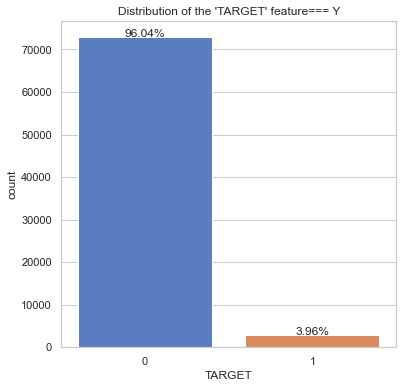

In [16]:
size=(6,6)
plt.figure(figsize=size)
ax = sns.countplot(x='TARGET',data=train_data)
total = train_data.shape[0]
for z in ax.patches:
    height = z.get_height()
    ax.text(z.get_x()+z.get_width()/2.,height ,
                '{:1.2f}%'.format(height*100/total),
                ha="center") 

plt.title("Distribution of the 'TARGET' feature=== Y")
target_1 = train_data[train_data['TARGET']==1].shape[0]
target_0 = train_data[train_data['TARGET']==0].shape[0]
print("The number of  dis-satisfied customers are :",target_1)
print("The number of satisfied customers are:",target_0)
print('')

plt.savefig('E:/distribution_of_target.png')
plt.show()

# Inference from the above bar-chart: We can see that the data is highly imbalanced with very few observations belonging to class-01

In [30]:
# Reference: https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

## DATA - PREPROCESSING-----STEPS (As per the Literature-Review done)
 1) Remove Constant Features (i.e. features with a standard deviation of "Zero" or those features which do not vary at all)
 
 2) Remove Duplicate Features (because they cause redundancy)
 
 3) Remove un-informative features (i.e. those features which have a very few non-zero values)
 
 4) Remove Duplicated observations (or duplicated rows in the dataset)
 
 5) Remove highly-correlated features (i.e. features which have a high correlation among themselves, remove one of those features and the features which have a very low correlation with the target variable, remove those)
 
 6) Remove those features which have only 1 unique-value. (not mentioned in literature though)
 
 7) Remove Index
 
 8) Remove Features with substring name "Delta" as they are relatively un-informative

# DATA - PREPROCESSING (STEP-01)
 1) Remove Constant Features (i.e. features with a standard deviation of "Zero" or those features which do not vary at all)

In [33]:
i=0
for column in train_data.columns: 
    if train_data[column].var()==0:  #if variance is found to be zero
        i+=1
        #del train_data[column] #delete those features from train_data
        #del test_data[column]   #delete those features from test_data
print("%i features with a zero variance; ------ ."%(i))

34 features with a zero variance; ------ .


In [34]:
#Check data shape after removal of 34 features

Important Note:
I have written the code to identify features with a "zero" variance but I have not yet deleted those from the dataset

In [35]:
print("shape of train data is:", train_data.shape)
print("shape of test data is:", test_data.shape)

shape of train data is: (76020, 371)
shape of test data is: (75818, 370)


# DATA - PREPROCESSING (STEP-02)
  Remove Duplicated Features (because they cause redundancy)

In [38]:
#Reference: https://www.geeksforgeeks.org/how-to-find-drop-duplicate-columns-in-a-pandas-dataframe/
# The below function take a dataframe as a parameter and returns a list of column-names whose contents are duplicates of one another


def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
            
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [157]:
# Get list of duplicate columns
duplicateColNames = getDuplicateColumns(train_data)
  
print('Duplicate Columns are :')
        
# Iterate through duplicate
# column names
#for col in duplicateColNames :
#    print('Column Name : ', col)

Duplicate Columns are :


In [40]:
# Dropping duplicate columns
#train_data = train_data.drop(columns = duplicateColNames)
#test_data = test_data.drop(columns = duplicateColNames)
#test_data = test_data.drop(columns = getDuplicateColumns(train_data))
  
print("Resultant Dataframe :")
  
print('Shape of Train Data', train_data.shape)
print('Shape of Test Data', test_data.shape)

Resultant Dataframe :
Shape of Train Data (76020, 371)
Shape of Test Data (75818, 370)


# Important Note:
#Again I have written the code for removal of duplicate columns but I have not deleted those from the dataset as yet

# DATA - PREPROCESSING-----STEP-03
Remove un-informative features (i.e. those features which have a very few non-zero values)

In [41]:
i=0
for colu in train_data.columns: 
    if np.percentile(train_data[colu],99)==0:
        i+=1
        #del train_data[colu]
        #del test_data[colu]
        
print("%i features were found to be sparse ------ ."%(i))

222 features were found to be sparse ------ .


In [42]:
print('Shape of Train Data', train_data.shape)
print('Shape of Test Data', test_data.shape)

Shape of Train Data (76020, 371)
Shape of Test Data (75818, 370)


# DATA - PREPROCESSING-----STEP-04
  Remove duplicated/identical Rows 

In [44]:
train_data.duplicated()    # check for duplicated rows in the entire train-dataframe

0        False
1        False
2        False
3        False
4        False
         ...  
76015    False
76016    False
76017    False
76018    False
76019    False
Length: 76020, dtype: bool

In [45]:
train_data.duplicated().sum() 

0

Hence, the above result with a sum of "Zero" shows that there are no duplicate rows in the entire train dataset

In [47]:
test_data.duplicated()    # check for duplicated rows in the entire train-dataframe

0        False
1        False
2        False
3        False
4        False
         ...  
75813    False
75814    False
75815    False
75816    False
75817    False
Length: 75818, dtype: bool

In [48]:
test_data.duplicated().sum() 

0

Hence, the above result with a sum of "Zero" shows that there are no duplicate rows in the entire train dataset

In [50]:
(~train_data.duplicated()).sum() #Count the number of non-duplicate rows in the train-data

76020

In [51]:
(~test_data.duplicated()).sum() #Count the number of non-duplicate rows in the test-data

75818

# DATA-PREPROCESSING -- STEP 05
  Remove Correlated features

In [52]:
# Correlated Features

 "Normalization" is to be done before computing Correlation

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit and transform data
tr_data_norm = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
#print(tr_data_norm)

In [55]:
tr_data_norm.shape

(76020, 371)

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit and transform data
te_data_norm = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)
#print(te_data_norm)

In [57]:
test_data.shape

(75818, 370)

In [58]:
# Reference: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection

 First, checking the correlation among the "Features" themselves

<AxesSubplot:>

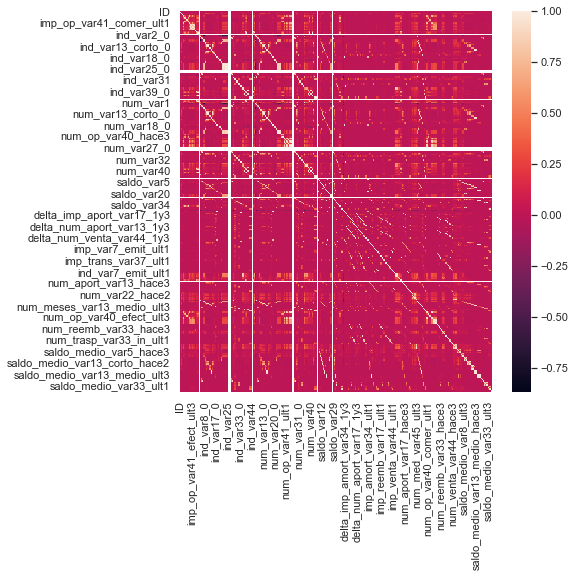

In [60]:
#plott the correlation matrix to check highly correlated features
corr = tr_data_norm.drop('TARGET',axis=1).corr() #computing correlation on normalized train_data, i.e. tr_data_norm
plt.figure(figsize=(7,7))
sns.heatmap(corr)

From the above we can observe that there are many features which have high correlation amongst themselves

Now, checking the correlation of the "Features" with the "Target" (i.e. 0 or 1)

In [64]:
# Now checking the correlation of all features with the target
corr_target = pd.DataFrame(tr_data_norm.corr()['TARGET']) #computing correlation on normalized train_data, i.e. tr_data_norm
corr_target.sort_values(by='TARGET',axis=0,ascending=0,inplace=True)
corr_target

,TARGET
TARGET,1.000000
var36,0.102919
var15,0.101322
ind_var8_0,0.046665
num_var8_0,0.046622
...,...
num_reemb_var33_hace3,NaN
num_trasp_var17_out_hace3,NaN
num_trasp_var33_out_hace3,NaN
saldo_var2_ult1,NaN


In [65]:
type(corr_target)

pandas.core.frame.DataFrame

In [66]:
corr_target[:50] #printing the top 50 features which have high correlation with the Target-variable (y)

,TARGET
TARGET,1.000000
var36,0.102919
var15,0.101322
ind_var8_0,0.046665
num_var8_0,0.046622
imp_op_var39_efect_ult1,0.030380
imp_op_var41_efect_ult1,0.029479
ind_var8,0.027926
num_var8,0.027926
imp_op_var41_ult1,0.027586


In [67]:
#Finding those features which have a least--correlation with the "TARGET-FEATURE" by setting a threshold value
thresh = 10**-2
print(corr_target[abs(corr_target['TARGET'])<=thresh])
print("So, there are %i features which are below %.5f correlation value with 'TARGET' FEATURE."%(corr_target[abs(corr_target['TARGET'])<=thresh].shape[0],\
                                                                                  thresh))

                             TARGET
num_var22_hace2            0.009789
num_var39                  0.009753
num_var40                  0.009753
ind_var40                  0.009753
ind_var39                  0.009753
...                             ...
delta_imp_aport_var13_1y3 -0.008378
num_aport_var13_ult1      -0.008415
ind_var31_0               -0.009163
imp_aport_var13_ult1      -0.009317
num_trasp_var11_ult1      -0.009326

[219 rows x 1 columns]
So, there are 219 features which are below 0.01000 correlation value with 'TARGET' FEATURE.


In [68]:
# Remove these features which have a very low correlation with the TARGET
#feat_to_remove = list(corr_df[abs(corr_df['TARGET'])<=t].index)
#for df in [train,test]:
#    df.drop(feat_to_remove,axis=1,inplace=True)

In [69]:
#train_data.drop(labels=correlated_features, axis=1, inplace=True)
#test_data.drop(labels=correlated_features, axis=1, inplace=True)
print('Shape of Train Data', train_data.shape)
print('Shape of Test Data', test_data.shape)

Shape of Train Data (76020, 371)
Shape of Test Data (75818, 370)


# DATA PRE-PROCESSING (STEP-06)
Remove those features which have only 1 unique value

In [74]:
unique_values = train_data.nunique()  #We get the number of unique_values for each feature/column using this function
print((unique_values))

ID                         76020
var3                         208
var15                        100
imp_ent_var16_ult1           596
imp_op_var39_comer_ult1     7551
                           ...  
saldo_medio_var44_hace3       33
saldo_medio_var44_ult1       141
saldo_medio_var44_ult3       141
var38                      57736
TARGET                         2
Length: 371, dtype: int64


In [75]:
print(train_data.shape)
# get number of unique values for each column
counts = train_data.nunique()
# record columns to delete
to_delete = [i for i,v in enumerate(counts) if v == 1]
print("The number of columns which contain 1 unique value are:", len(to_delete))
print(to_delete)


(76020, 371)
The number of columns which contain 1 unique value are: 34
[22, 23, 57, 58, 59, 60, 81, 85, 86, 132, 133, 134, 135, 156, 162, 163, 180, 181, 190, 193, 221, 223, 235, 239, 245, 249, 262, 263, 304, 308, 316, 320, 328, 350]


In [78]:
# drop feature-columns with only 1-2 unique values
#train_data.drop(to_delete, axis=1, inplace=True)
#test_data.drop(to_delete, axis=1, inplace=True)
#print(train_data.shape)
#print(test_data.shape)

In [81]:
######################

# DATA PREPROCESSING - STEP 07
Remove index columns from train data and test data

In [83]:

del train_data['ID']
del test_data['ID']
print(train_data.shape)
print(test_data.shape)

(76020, 370)
(75818, 369)


In [160]:
#train_data

In [161]:
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique


# to summarize the number of unique values in each column
for i in range(train_data.shape[1]):
    numb = len(unique(train_data.iloc[:, i]))
    percentage = (float(numb) / (train_data.shape[0])) * 100
    #print('%d, %d, %.1f%%' % (i, numb, percentage))


In [87]:
# In the below code, we summarize those variables that have unique values that are less than 1 percent of the number of rows.

In [2]:
# summarize the number of unique values in each column

#for i in range(train_data.shape[1]):
    
#    num = len(unique(train_data.iloc[:, i]))
#    percentage = float(num) / train_data.shape[0] * 100
    #if percentage < 1:
        #print('%d, %d, %.1f%%' % (i, num, percentage))

In [90]:


# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
#print(df.shape)
# get number of unique values for each column
#counts = df.nunique()
# record columns to delete
#to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
#print(to_del)
# drop useless columns
#df.drop(to_del, axis=1, inplace=True)
#print(df.shape)


# DATA PREPROCESSING - STEP 08
 Remove Delta features (As they are not very informative)

In [ ]:
# Important Note:---To be done (not removed any feature as of now)

 After the pre-processing steps, now proceeding towards the Feature-wise analysis of individual features one by one

# Feature Wise Analysis

# First: Analysis of feature called::  var15 
var15 has second highest correlation with the "TARGET" variable-y

 As per the Literature, var15 seems to represent "AGE" of the customers

In [17]:
max_value = train_data['var15'].max()
min_value = train_data['var15'].min()
print("The minimum value of feature-var15 is %i and maximum value of feature-var15 is %i."%(min_value,max_value ))

The minimum value of feature-var15 is 5 and maximum value of feature-var15 is 105.


In [18]:
# It is being documented through literature review that var15 is a feature representing "AGE" of the customer. So the minimum 
# age of a customer is 5 and maximum age is 105.

In [19]:
np.array(sorted(train_data.var15.unique()))  #getting all the unique values in var38 feature-variable

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 104, 105], dtype=int64)

In [20]:
len(np.array(sorted(train_data.var15.unique())))  #getting all the unique values in var38 feature-variable

100

 Hence, var15 is a categorical feature with 100 categories

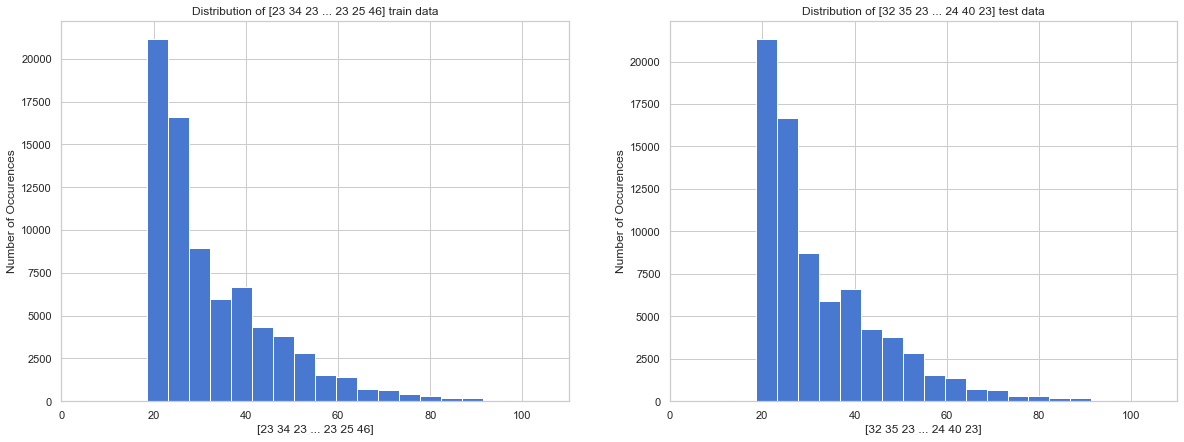

In [21]:

var=train_data['var15'].values
variable = test_data['var15'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

From the above distributions we can see that both train and test set have similar distributions where most of the customers
constitute "young-customers", i.e. below the age of 40. With increase in age of customers, the frequency is decreasing, which means the bank has more young customers and less of old-aged customers

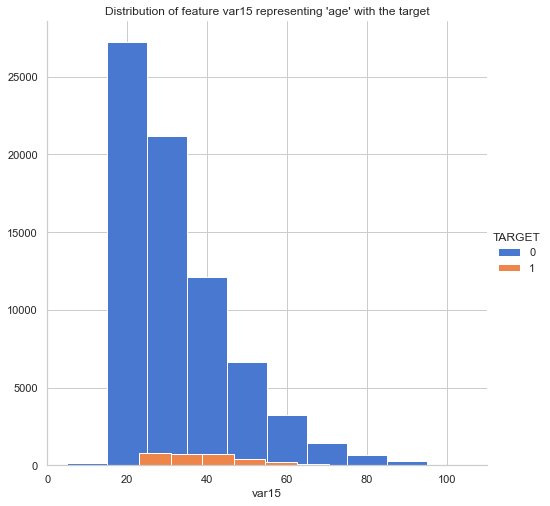

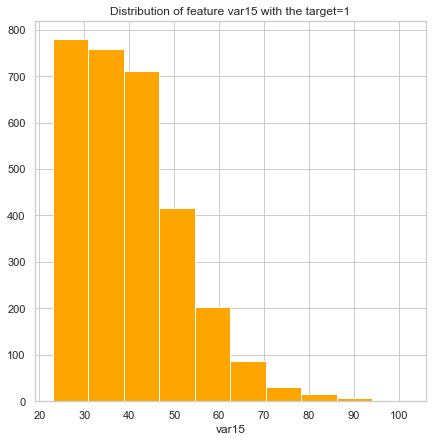

The minimum age of the dis-satisfied customer is 23 and maximum age of the dis-satisfied customer is 102 .


In [23]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var15').add_legend()
plt.title("Distribution of feature var15 representing 'age' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var15'],color='orange')
plt.title("Distribution of feature var15 with the target=1")
plt.xlabel('var15')


plt.savefig('E:/distri_here.png')
plt.show()

max_value = mask['var15'].max()
min_value = mask['var15'].min()
print("The minimum age of the dis-satisfied customer is %i and maximum age of the dis-satisfied customer is %i ."%(min_value,max_value ))

From the above we can see that most of the customers in different age-groups are satisfied.
The number of dis-satisfied customers is very less as in the second bar-chart (yellow-colour), the frequency bar goes upto 800 only.

In [24]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var15'))

print((train_data['var15'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('var15'))
    
print((train_data['var15'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var15'))
    
print((test_data['var15'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('var15'))
    
print((test_data['var15'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'var15':
23    26.532491
24     8.197843
25     5.547224
26     4.301500
27     3.763483
Name: var15, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'var15':
97     0.003946
104    0.002631
98     0.001315
105    0.001315
101    0.001315
Name: var15, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var15':
23    26.845868
24     8.160331
25     5.625313
26     4.520035
27     3.677227
Name: var15, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'var15':
10     0.003957
105    0.002638
102    0.002638
99     0.001319
104    0.001319
Name: var15, dtype: float64


In the above statistics, we can see that, maximum customers are aged 23, followed by those aged 24, then 25, 26 and 27
in both train and test data. (i.e. young customers mostly)
While the customers of higher age (like 97, 104, 98, 105, 101) have the lowest frequency count.

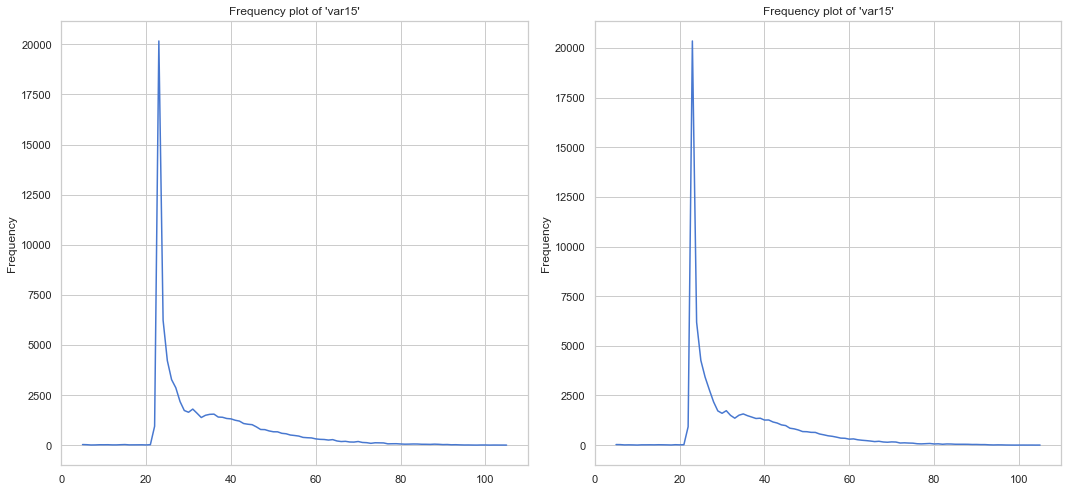

In [35]:

value_countss('var15', train_data, test_data, 'E:/distri.png')



The above plot shows that the customers within the age bracket of 20-30 are exceptionally high in frequency(number) as 
compared to any other age segment within the bank. And then further, with increase in age, the frequency(number) of customers
keeps declining.

# Second: Analysis of feature called:: var38

In [25]:
max_value = train_data['var38'].max()
min_value = train_data['var38'].min()
print("The minimum value of feature-var38 is %i and maximum value of feature-var38 is %i."%(min_value,max_value ))

The minimum value of feature-var38 is 5163 and maximum value of feature-var38 is 22034738.


In [26]:
np.array(sorted(train_data.var38.unique()))  #getting all the unique values in var38 feature-variable

array([5.16375000e+03, 6.48066000e+03, 6.77313000e+03, ...,
       1.18578565e+07, 1.32686213e+07, 2.20347388e+07])

In [27]:
len(np.array(sorted(train_data.var38.unique())))

57736

There are a lot of unique value in var38 (57736).Hence, var38 is a "numerical" feature
According to the Literature, "var38" represents "Mortgage values"...The values of var38 are quite large numbers due to which the literature has documented that var38 represents mortgage values

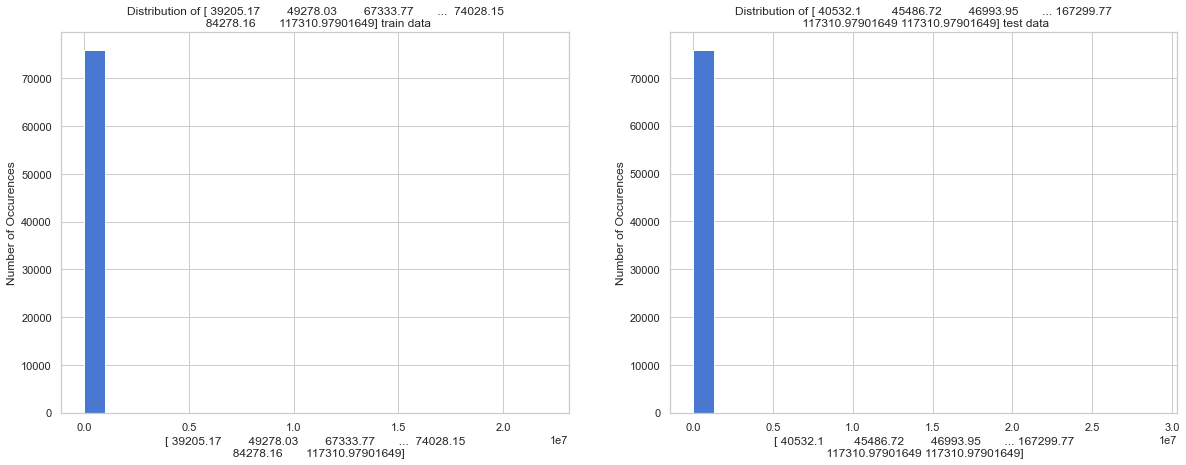

In [28]:
var=train_data['var38'].values
variable = test_data['var38'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

The above distributions of var38 shows that one particular value is high in frequency than all other values..
To find out that particular value, we try to extract the "percentage value counts" information of var38 in the next step below

In [29]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var38'))

print((train_data['var38'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('var38'))
    
print((train_data['var38'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var38'))
    
print((test_data['var38'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('var38'))
    
print((test_data['var38'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'var38':
117310.979016    19.558011
451931.220000     0.021047
463625.160000     0.015785
288997.440000     0.014470
104563.800000     0.014470
Name: var38, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'var38':
318211.44    0.001315
73069.26     0.001315
36425.37     0.001315
163515.90    0.001315
159395.52    0.001315
Name: var38, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var38':
117310.979016    19.527025
451931.220000     0.021103
128318.520000     0.015827
288997.440000     0.013189
97639.560000      0.010552
Name: var38, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'var38':
96156.96     0.001319
89458.26     0.001319
101990.49    0.001319
156374.70    0.001319
92467.35     0.001319
Name: var38, dtype: float64


So, the value which is highest in frequency than all other values with a significant margin is 117310.979016 (19.55%)
While all other values occur with a quite low frequency close to 0%.

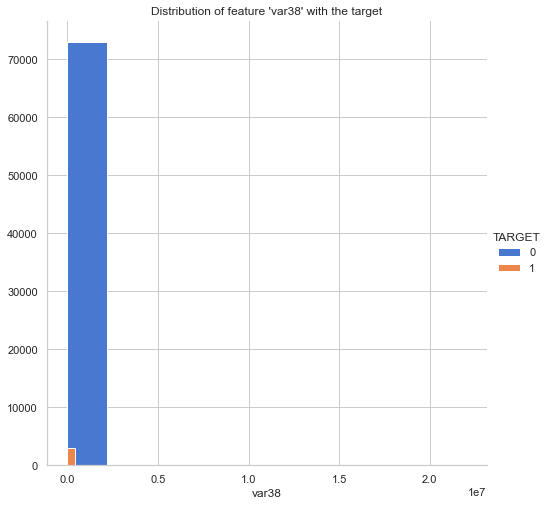

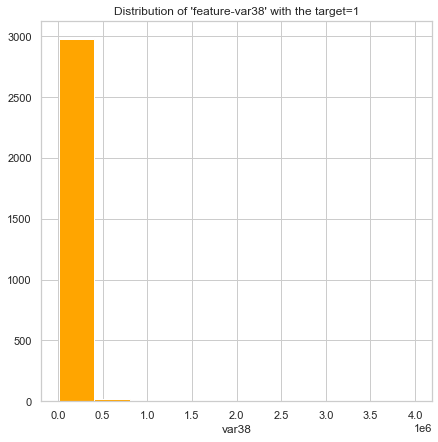

In [30]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var38').add_legend()
plt.title("Distribution of feature 'var38' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var38'],color='orange')
plt.title("Distribution of 'feature-var38' with the target=1")
plt.xlabel('var38')
plt.show()

max_value = mask['var38'].max()
min_value = mask['var38'].min()

The above bar-chart shows that most of the customers with respect to the feature var38 are satisified.

# Third--Analysis of feature called:: var3

In [41]:
max_value = train_data['var3'].max()
min_value = train_data['var3'].min()
print("The minimum value of feature-var3 is %i and maximum value of feature-var3 is %i."%(min_value,max_value ))

The minimum value of feature-var3 is -999999 and maximum value of feature-var3 is 238.


In [42]:
np.array(sorted(train_data.var3.unique()))  #getting all the unique values in var3 feature-variable

array([-999999,       0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,
            13,      14,      15,      16,      17,      18,      19,
            20,      21,      22,      23,      24,      25,      26,
            27,      28,      29,      30,      31,      32,      33,
            34,      35,      36,      38,      40,      41,      42,
            43,      44,      45,      46,      47,      48,      49,
            50,      51,      52,      53,      54,      55,      56,
            57,      58,      59,      60,      61,      62,      63,
            64,      65,      66,      68,      69,      71,      72,
            73,      74,      76,      77,      78,      79,      81,
            82,      84,      85,      86,      87,      88,      89,
            90,      91,      93,      94,      95,      96,      97,
            98,      99,     100,     101,     102,     103,     104,
           105,     

In [43]:
len(np.array(sorted(train_data.var3.unique())))

208

From the above it is clear that unique-values range between 0 and 238.
So, var3 is categorical feature with 208 categories

The literature assumes var3 to be a representative of "nationality" of customers because 208 seems to be a plausible number that the bank can supply

In [44]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var3'))

print((train_data['var3'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('var3'))
    
print((train_data['var3'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var3'))
    
print((test_data['var3'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('var3'))
    
print((test_data['var3'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'var3':
 2         97.559853
 8          0.181531
-999999     0.152591
 9          0.144699
 3          0.142068
Name: var3, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'var3':
177    0.001315
87     0.001315
151    0.001315
215    0.001315
191    0.001315
Name: var3, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var3':
 2         97.552032
-999999     0.158274
 8          0.152998
 9          0.142446
 3          0.141127
Name: var3, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'var3':
179    0.001319
220    0.001319
127    0.001319
94     0.001319
191    0.001319
Name: var3, dtype: float64


Fromt the value count percentage of var3 (nationality) we can observe that the value-2 represents the highest frequency than
any other value with a significant margin difference.
It is an inference drawn in literature that the value "2" might stand for USA(country) as it is the main market for 
Santander Bank's operations

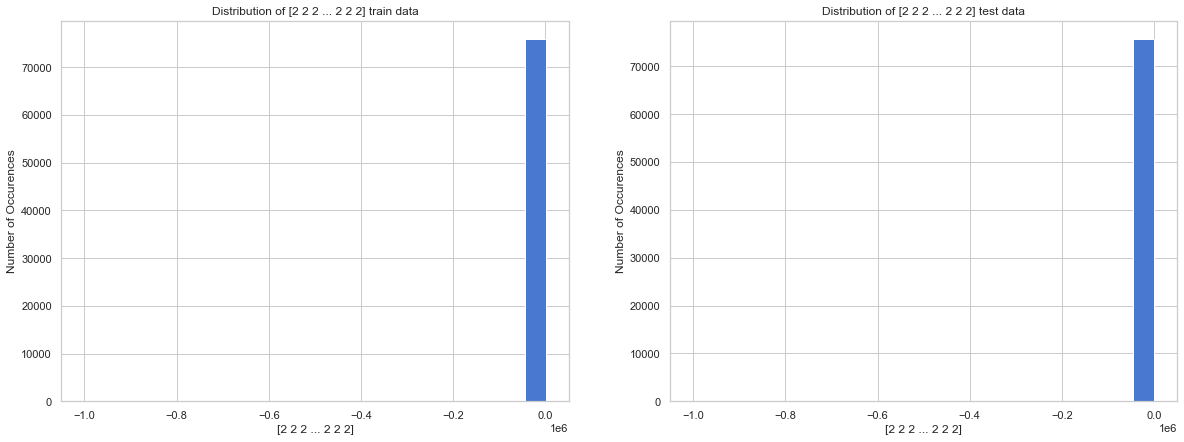

In [45]:
var=train_data['var3'].values
variable = test_data['var3'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

The bar chart shows that there is one value which exists in highest frequency than all other values and that value is "2" as
can be inferenced from the value percentage count done above

In [46]:
def value_counting(column,train,test):
    plt.subplots(1,2,figsize=(15,7))
    
    plt.subplot(121)  # First plot the frequency count for train-data
    df = train[column].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Frequency plot of '%s'"%(column))
    plt.ylabel('Frequency')

    
    plt.subplot(122)  # Then plot the frequency count for test data
    df = test[column].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Frequency plot of '%s'"%(column))
    plt.ylabel('Frequency')

    plt.tight_layout()
    
    plt.show()
   

In [47]:
def value_countss(column,train,test,fig):
    plt.subplots(1,2,figsize=(15,7))
    
    plt.subplot(121)  # First plot the frequency count for train-data
    df = train[column].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Frequency plot of '%s'"%(column))
    plt.ylabel('Frequency')

    
    plt.subplot(122)  # Then plot the frequency count for test data
    df = test[column].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Frequency plot of '%s'"%(column))
    plt.ylabel('Frequency')

    plt.tight_layout()
    
    plt.savefig(fig)
    plt.show()
   

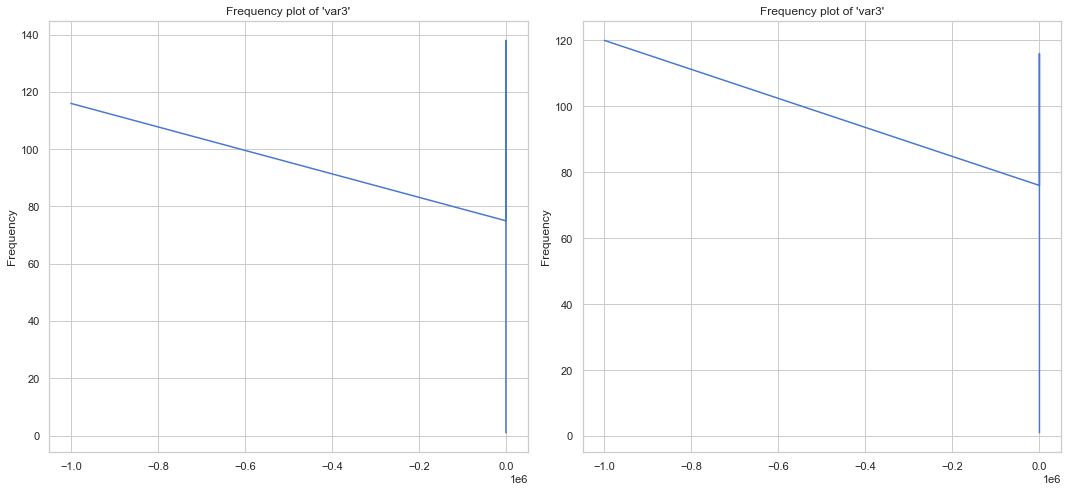

In [58]:

#plott the frequency for var3 by excluding value 2
value_counting('var3',train_data[train_data['var3']!=2],test_data[ test_data['var3']!=2])

The above plot shows higher frequency for lower values (values between 0 and 10) and then reducing frequency for the higher
values. Which may be because the Bank might have set initial value numbers (like 1,2,3...10) for countries where it has
bigger volume of operations as compared to other countries.

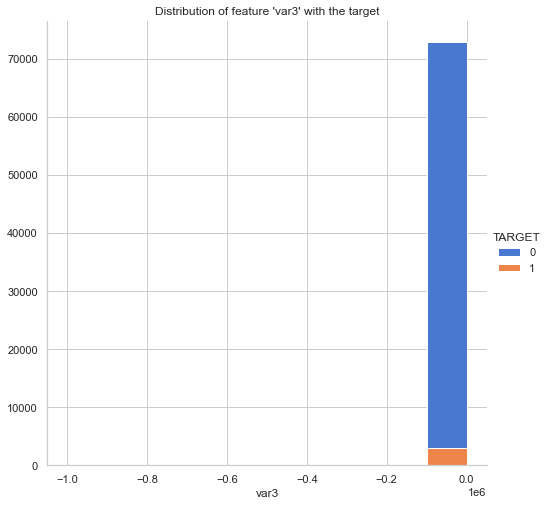

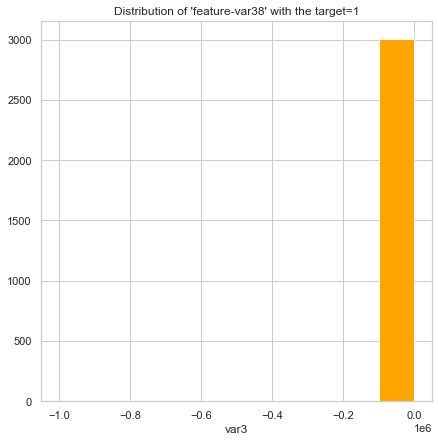

In [59]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var3').add_legend()
plt.title("Distribution of feature 'var3' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var3'],color='orange')
plt.title("Distribution of 'feature-var38' with the target=1")
plt.xlabel('var3')
plt.show()

max_value = mask['var3'].max()
min_value = mask['var3'].min()

The above plot shows that most of the customers are satisfied and the number of dis-satisfied customers is very few (upto 3000)
in numbers.

# Fourth: Analysis of feature called: var38

In [84]:
max_value = train_data['var38'].max()
min_value = train_data['var38'].min()
print("The minimum value of feature-var38 is %i and maximum value of feature-var38 is %i."%(min_value,max_value ))

The minimum value of feature-var38 is 5163 and maximum value of feature-var38 is 22034738.


In [74]:
np.array(sorted(train_data.var38.unique()))  #getting all the unique values in var3 feature-variable

array([5.16375000e+03, 6.48066000e+03, 6.77313000e+03, ...,
       1.18578565e+07, 1.32686213e+07, 2.20347388e+07])

In [75]:
len(np.array(sorted(train_data.var38.unique())))

57736

In [76]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var38'))

print((train_data['var38'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('var38'))
    
print((train_data['var38'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var38'))
    
print((test_data['var38'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('var38'))
    
print((test_data['var38'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'var38':
117310.979016    19.558011
451931.220000     0.021047
463625.160000     0.015785
288997.440000     0.014470
104563.800000     0.014470
Name: var38, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'var38':
318211.44    0.001315
73069.26     0.001315
36425.37     0.001315
163515.90    0.001315
159395.52    0.001315
Name: var38, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var38':
117310.979016    19.527025
451931.220000     0.021103
128318.520000     0.015827
288997.440000     0.013189
97639.560000      0.010552
Name: var38, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'var38':
96156.96     0.001319
89458.26     0.001319
101990.49    0.001319
156374.70    0.001319
92467.35     0.001319
Name: var38, dtype: float64


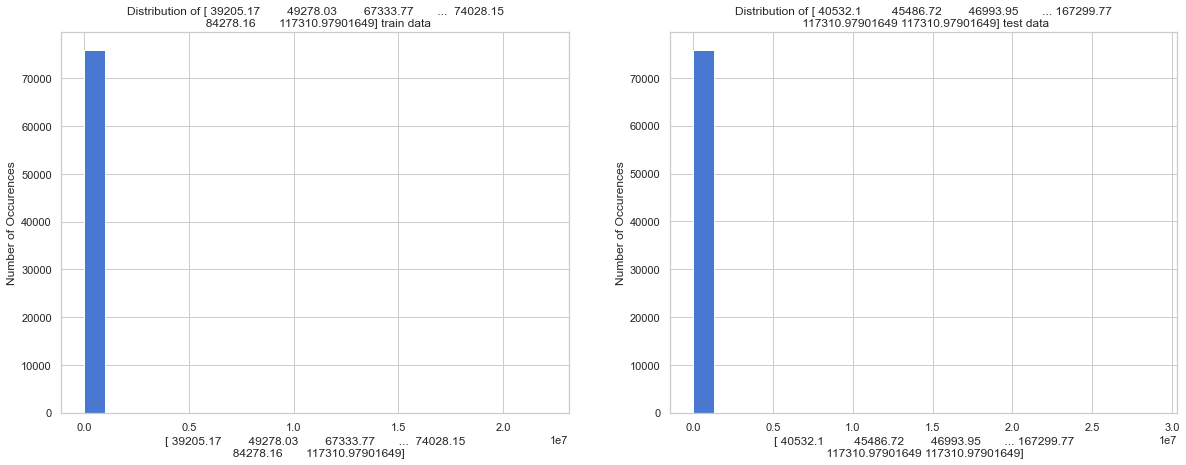

In [77]:
var=train_data['var38'].values
variable = test_data['var38'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

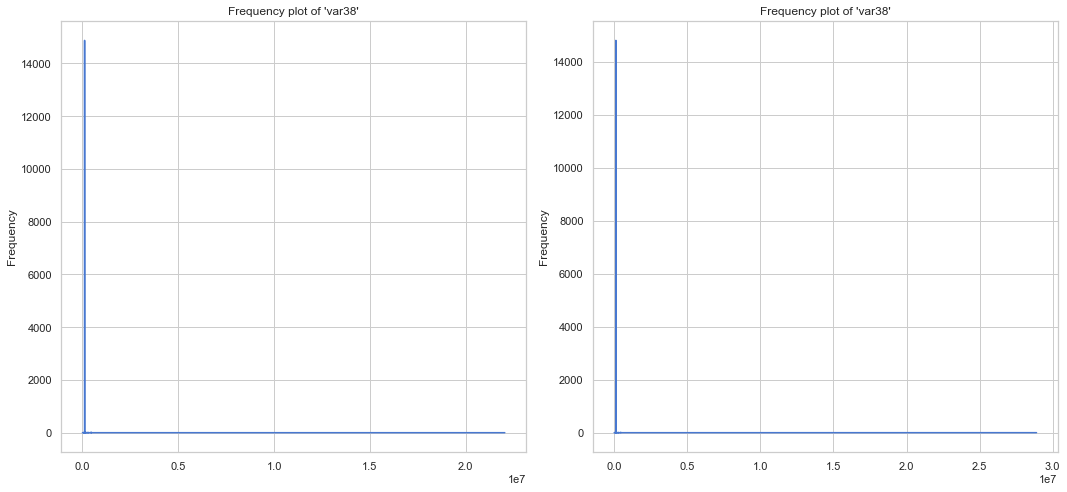

In [78]:
value_counting('var38', train_data[train_data['var38']!=0], test_data[test_data['var38']!=0 ])
# We plot the frequency chart by excluding the "zero" value

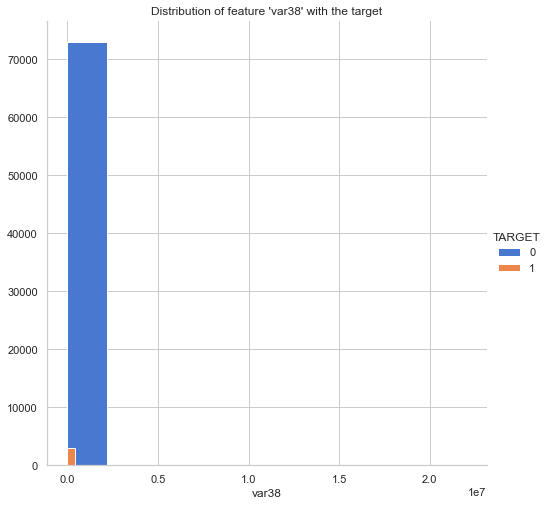

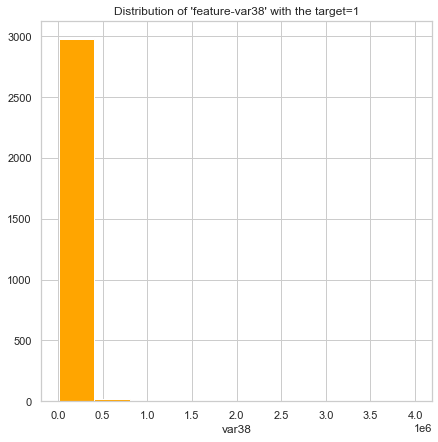

In [81]:
#distribution of target
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var38').add_legend()
plt.title("Distribution of feature 'var38' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var38'],color='orange')
plt.title("Distribution of 'feature-var38' with the target=1")
plt.xlabel('var38')
plt.show()

max_value = mask['var38'].max()
min_value = mask['var38'].min()

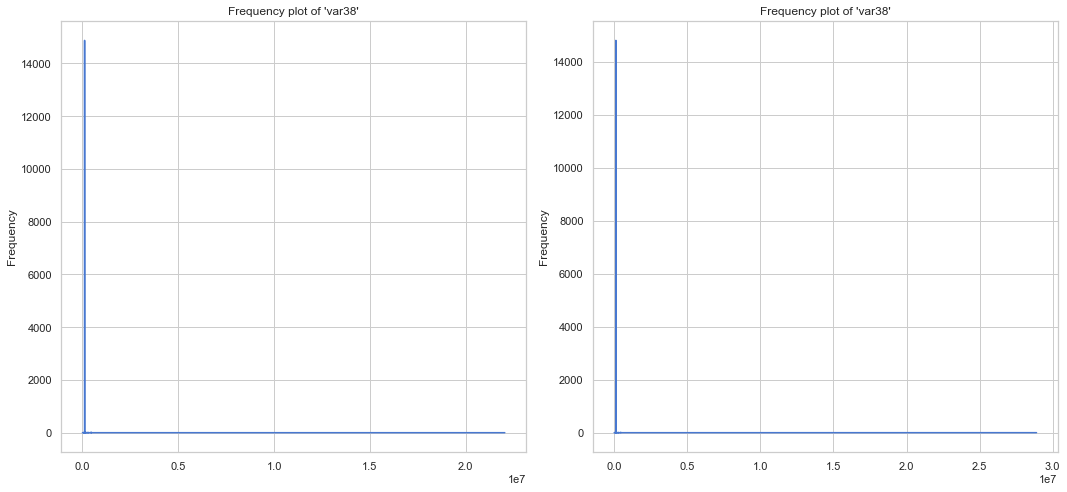

In [82]:
value_counting('var38', train_data[train_data['var38']!=0], test_data[test_data['var38']!=0 ])
# We plot the frequency chart by excluding the "zero" value 

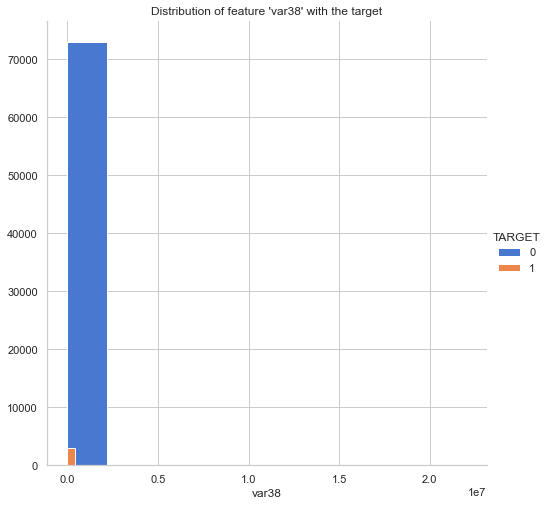

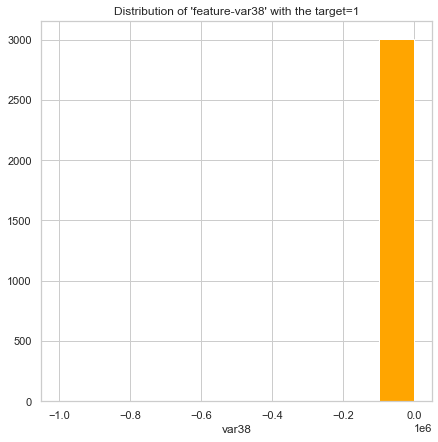

In [83]:
#distribution of target
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var38').add_legend()
plt.title("Distribution of feature 'var38' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var3'],color='orange')
plt.title("Distribution of 'feature-var38' with the target=1")
plt.xlabel('var38')
plt.show()

max_value = mask['var38'].max()
min_value = mask['var38'].min()

# Fifth----Analysis of feature called:: var21

In [106]:
max_value = train_data['var21'].max()
min_value = train_data['var21'].min()
print("The minimum value of feature-var21 is %i and maximum value of feature-var21 is %i."%(min_value,max_value ))

The minimum value of feature-var21 is 0 and maximum value of feature-var21 is 30000.


In [107]:
np.array(sorted(train_data.var21.unique()))  #getting all the unique values in var3 feature-variable

array([    0,   900,  1200,  1500,  1800,  2100,  2400,  2700,  3000,
        3300,  3600,  4200,  4500,  5100,  5400,  5700,  6000,  6600,
        7200,  7500,  9000, 10500, 18000, 30000], dtype=int64)

In [108]:
len(np.array(sorted(train_data.var21.unique())))

24

Thus, var21 seems to be a categorical feature with 24 categories

In [109]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var21'))

print((train_data['var21'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('var21'))
    
print((train_data['var21'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var21'))
    
print((test_data['var21'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('var21'))
    
print((test_data['var21'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'var21':
0       98.858195
900      0.310445
1800     0.270981
4500     0.126283
3000     0.110497
Name: var21, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'var21':
7500     0.001315
6600     0.001315
5700     0.001315
10500    0.001315
30000    0.001315
Name: var21, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var21':
0       98.791844
900      0.345564
1800     0.292806
4500     0.129257
3000     0.102878
Name: var21, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'var21':
7500    0.001319
5100    0.001319
2100    0.001319
6900    0.001319
3900    0.001319
Name: var21, dtype: float64


The above percentage counts show that the value "0" occurs way more frequently than any other value with a hugeee difference.
Also, the literature goes on to say that var21 is a highly imbalanced feature where the non-zero values do not give off any
likely meaning as their percentage count is so low.

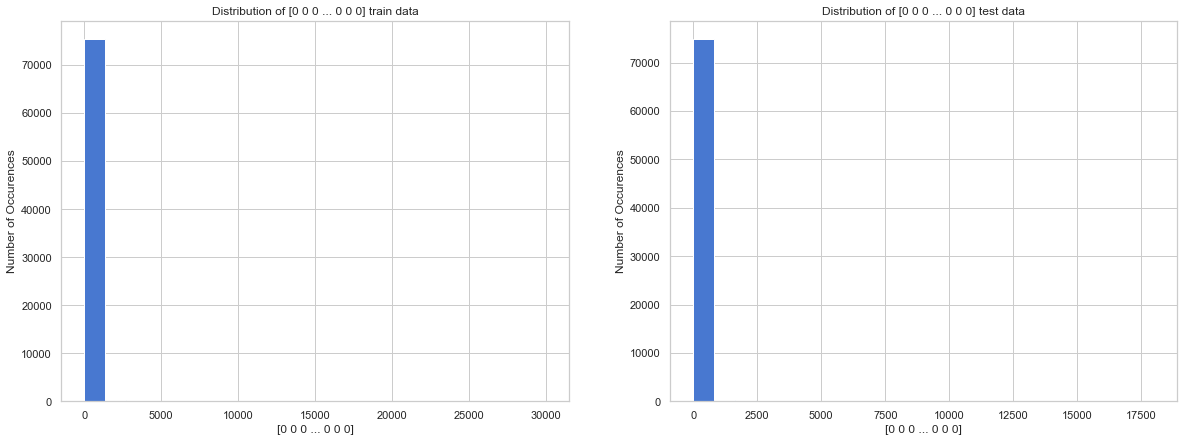

In [85]:
var=train_data['var21'].values
variable = test_data['var21'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
plt.savefig('E:/distri_var21.png')

    
plt.show()
print("")

The above graph shows that the frequency of one value dominates the frequency-occurence of all other values and we know that
value is "0"

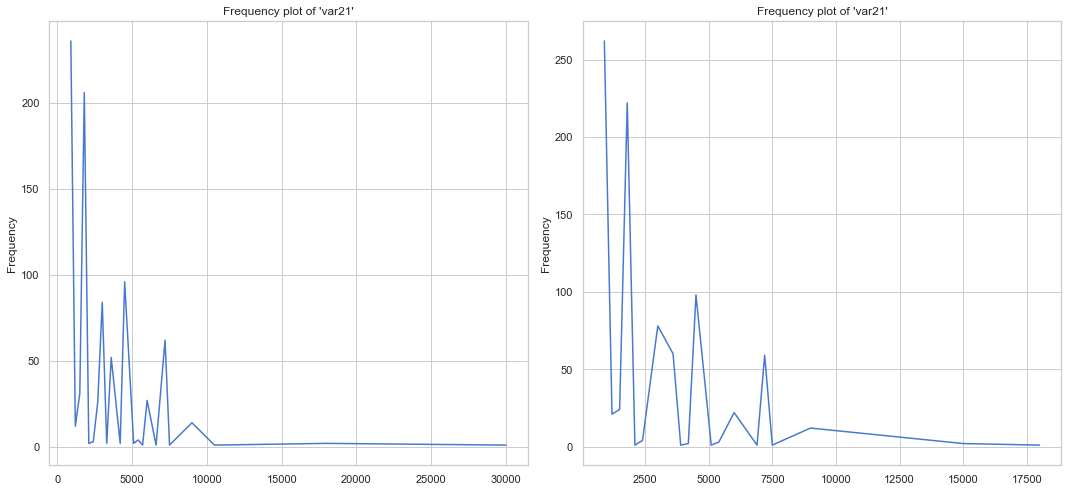

In [112]:
value_counting('var21', train_data[train_data['var21']!=0], test_data[test_data['var21']!=0 ])
# We plot the frequency chart by excluding the "zero" value 

Both train data and test data have similar distributions.
It can be seen that lower values (those close to zero) are still higher in frequency and the frequency keeps decreasing as the
values increase in magnitude.


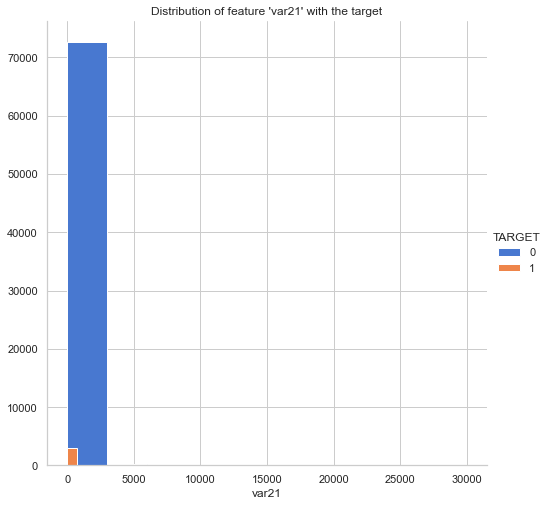

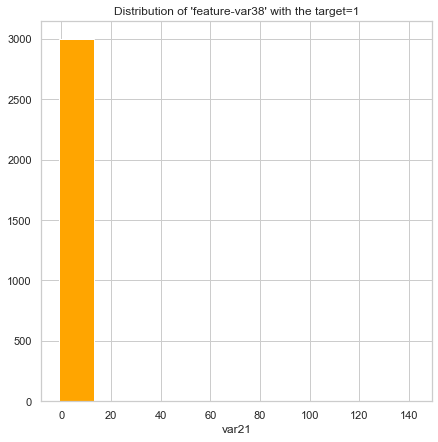

In [113]:
#distribution of target
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var21').add_legend()
plt.title("Distribution of feature 'var21' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var3'],color='orange')
plt.title("Distribution of 'feature-var38' with the target=1")
plt.xlabel('var21')
plt.show()

max_value = mask['var21'].max()
min_value = mask['var21'].min()

It can be seen from the above distribution that most of the customers are satisfied with respect to var21 feature

# Sixth---Analysis of feature called:: var36 
Also, var36 is the one which has highest correlation with the "TARGET" Feature)

In [86]:
max_value = train_data['var36'].max()
min_value = train_data['var36'].min()
print("The minimum value of feature-var36 is %i and maximum value of feature-var36 is %i."%(min_value,max_value ))

The minimum value of feature-var36 is 0 and maximum value of feature-var36 is 99.


In [87]:
np.array(sorted(train_data.var36.unique()))  #getting all the unique values in var3 feature-variable

array([ 0,  1,  2,  3, 99], dtype=int64)

In [88]:
len(np.array(sorted(train_data.var36.unique())))

5

Hence, var36 is a categorical feature with 5 categories.

The Literature-review is unable to determine what does "var36" stand for.

However, due to one value being so large (99) than rest of the values (0,1,2,3)----it seems that value-99 may represent "missing-values"

Also, one hot encoding was applied to this feature by previous researchers to better understand this feature.

In [89]:
#gett the most-common top 5 counts or the frequently occuring values of var36 existing in the train data
train_data['var36'].value_counts()[:5]

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

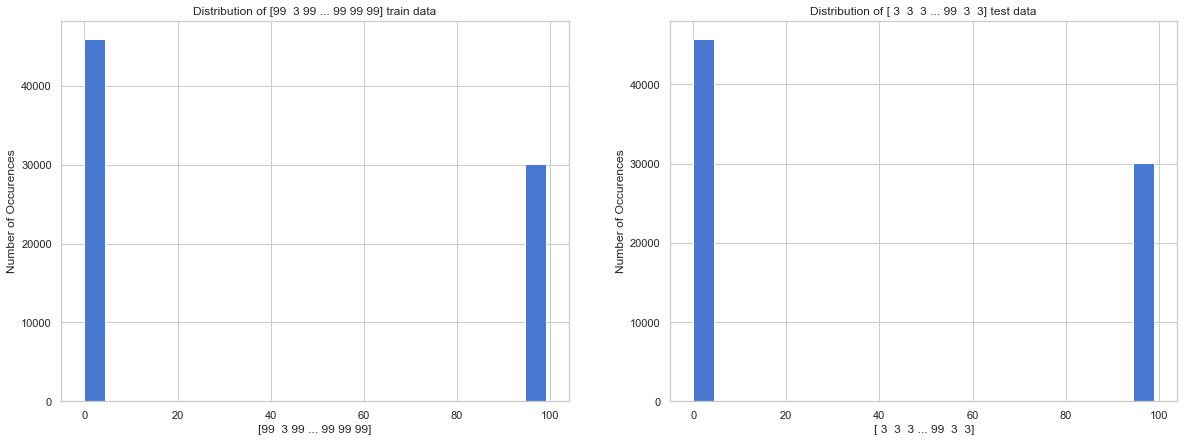

In [95]:
var=train_data['var36'].values
variable = test_data['var36'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
plt.savefig('E:/distri_var36.png')  
plt.show()
print("")

The above plots show the same distribution for train and test data
Also, the plots show that basically 2 values are high in frequency and rest (other 3) are negligible in number.

In [91]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('var36'))

print((train_data['var36'].value_counts()*100/train_data.shape[0]).iloc[:5])
    

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('var36'))
    
print((test_data['var36'].value_counts()*100/test_data.shape[0]).iloc[:5])

Percentage value counts(top 5 ) in the train data for 'var36':
99    39.547488
3     29.172586
1     19.289661
2     11.449619
0      0.540647
Name: var36, dtype: float64
Percentage value counts(top 5 ) in the test data for 'var36':
99    39.693740
3     29.301749
1     18.950645
2     11.564536
0      0.489330
Name: var36, dtype: float64


From the above we can see that the highest frequency count is of the value "99" followed by value "3" and consequently
"1", "2" and "0"

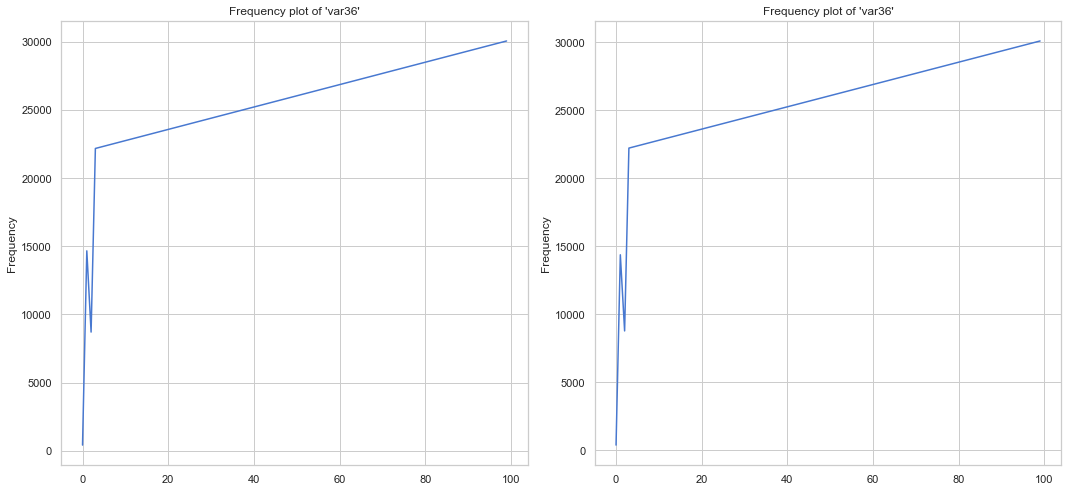

In [92]:
value_counting('var36',train_data,test_data)

The above plot shows that the higher values (like 99) are high in frequency as compared to smaller values.


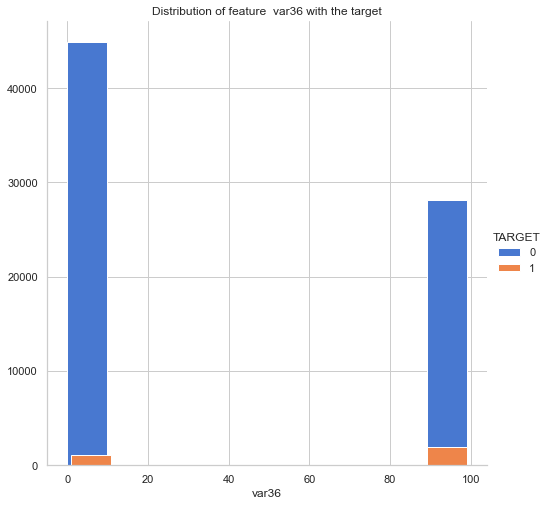

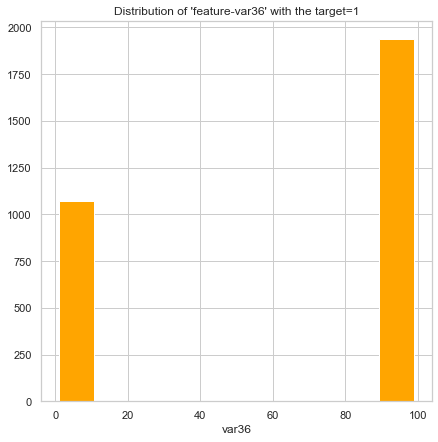

In [93]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var36').add_legend()
plt.title("Distribution of feature  var36 with the target")
plt.show()




mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['var36'],color='orange')
plt.title("Distribution of 'feature-var36' with the target=1")
plt.xlabel('var36')
plt.show()

max_value = mask['var36'].max()
min_value = mask['var36'].min()

The above distribution shows that for var36, most of the customers are satisfied.

The number of dis-satisfied customers is low as the frequency goes upto 2000 (max)

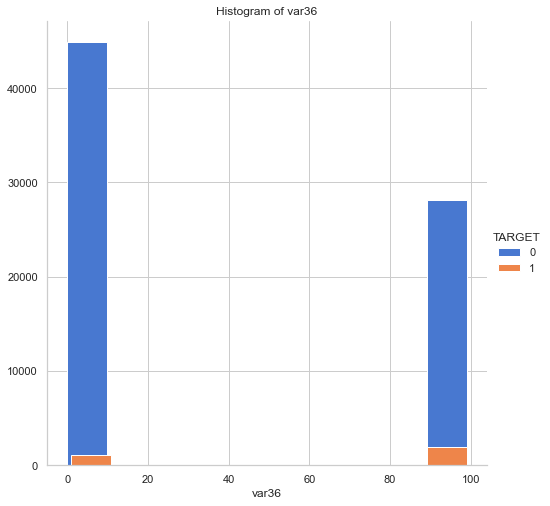

Percentage of dis-satisfied consumers wen 'var36'==99 is 6.446%
Percentage of dis-satisfied consumers wen 'var36'==3 is 1.659%
Percentage of dis-satisfied consumers wen 'var36'==2 is 2.769%
Percentage of dis-satisfied consumers wen 'var36'==1 is 3.144%
Percentage of dis-satisfied consumers wen 'var36'==0 is 0.000%


In [94]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'var36').add_legend()
plt.title('Histogram of %s'%('var36'))
plt.show()
for i in train_data['var36'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('var36',i,train_data[(train_data['TARGET']==1)&(train_data['var36']==i)]['var36'].shape[0]*100/\
       train_data[train_data['var36']==i].shape[0]))

# Seventh:: Analysis of feature called:: num_var4

In [60]:
max_value = train_data['num_var4'].max()
min_value = train_data['num_var4'].min()
print("The minimum value of feature-var36 is %i and maximum value of num_var4 is %i."%(min_value,max_value ))

The minimum value of feature-var36 is 0 and maximum value of num_var4 is 7.


In [61]:
np.array(sorted(train_data.num_var4.unique()))  #getting all the unique values in num_var4 feature-variable

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [62]:
len(np.array(sorted(train_data.num_var4.unique())))

8

num_var4 is a categorical feature with 8 categories

As per literature, this variable-feature num_var4 represents the "number of bank products" held by each customer

In [63]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('num_var4'))

print((train_data['num_var4'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('num_var4'))
    
print((train_data['num_var4'].value_counts()*100/train_data.shape[0]).iloc[-5:])

    
print("Percentage value counts(top 5 ) in the test data for '%s':"%('num_var4'))
    
print((test_data['num_var4'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('num_var4'))
    
print((test_data['num_var4'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5 ) in the train data for 'num_var4':
1    50.180216
0    25.687977
2    16.695606
3     5.757695
4     1.356222
Name: num_var4, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'num_var4':
3    5.757695
4    1.356222
5    0.267035
6    0.047356
7    0.007893
Name: num_var4, dtype: float64
Percentage value counts(top 5 ) in the test data for 'num_var4':
1    50.311272
0    25.582316
2    16.571263
3     5.811285
4     1.409955
Name: num_var4, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'num_var4':
5    0.258514
6    0.047482
7    0.003957
8    0.002638
9    0.001319
Name: num_var4, dtype: float64


The above value percentage counts depict that half the customers of bank possess or use only 1 product of the bank
Only 1 percent customer use 4 products of the bank

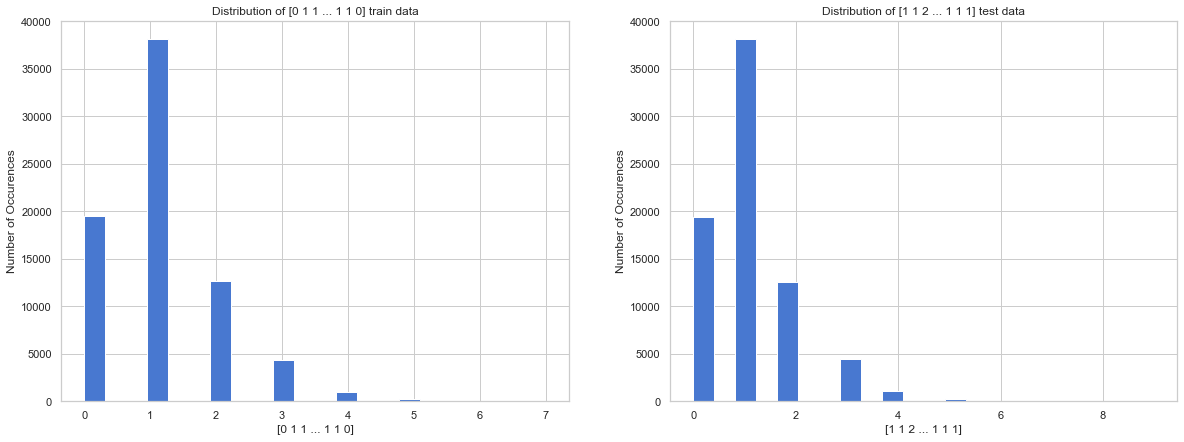

In [66]:
var=train_data['num_var4'].values
variable = test_data['num_var4'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
plt.savefig('E:/distri_num_var_4.png')   
plt.show()
print("")

From the above distributions it is clear that maximum number of customers have 1 bank product. 
However, fewer people hold multiple products.

Now, it is to be seen which of these customers are more satisfied

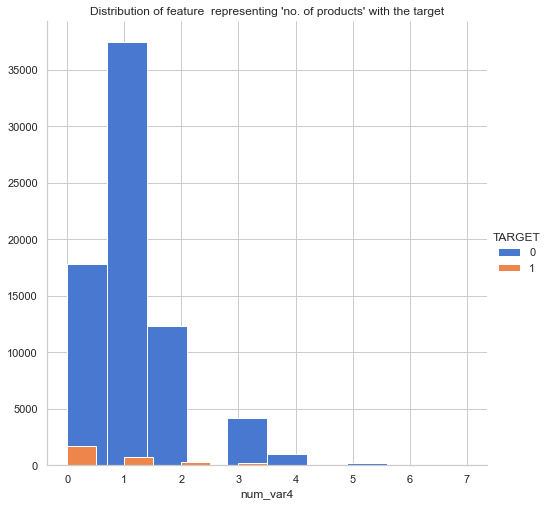

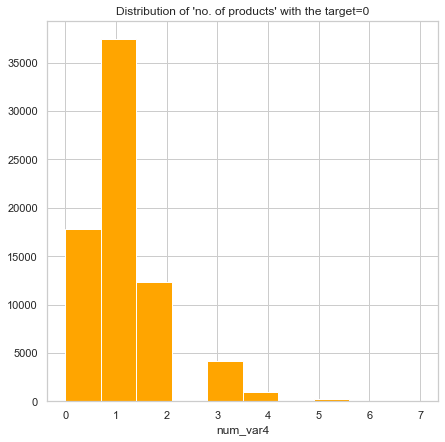

In [68]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var4').add_legend()
plt.title("Distribution of feature  representing 'no. of products' with the target")
plt.show()

mask = train_data[(train_data['TARGET']==0)]
plt.figure(figsize=(7,7))
plt.hist(mask['num_var4'],color='orange')
plt.title("Distribution of 'no. of products' with the target=0")
plt.xlabel('num_var4')

plt.savefig('E:/distri_num_var_4_4.png')   
plt.show()

max_value = mask['num_var4'].max()
min_value = mask['num_var4'].min()


The above distribution shows that fewer people have multiple products with the bank.
Customers who have multiple products with   the bank are  more satisfied with the bank's services as compared to customers with only one product


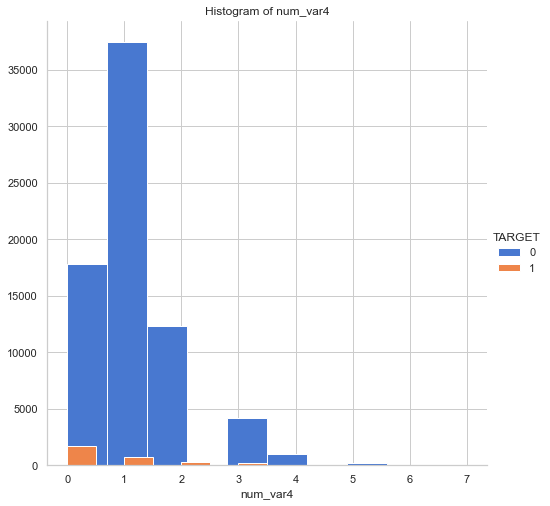

Percentage of dis-satisfied consumers wen 'num_var4'==0 is 8.895%
Percentage of dis-satisfied consumers wen 'num_var4'==1 is 1.814%
Percentage of dis-satisfied consumers wen 'num_var4'==3 is 4.158%
Percentage of dis-satisfied consumers wen 'num_var4'==2 is 2.624%
Percentage of dis-satisfied consumers wen 'num_var4'==4 is 5.626%
Percentage of dis-satisfied consumers wen 'num_var4'==5 is 2.956%
Percentage of dis-satisfied consumers wen 'num_var4'==6 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var4'==7 is 0.000%


In [168]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var4').add_legend()
plt.title('Histogram of %s'%('num_var4'))
plt.show()
for i in train_data['num_var4'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var4',i,train_data[(train_data['TARGET']==1)&(train_data['num_var4']==i)]['num_var4'].shape[0]*100/\
       train_data[train_data['num_var4']==i].shape[0]))

# Eighth:  feature named 'num_var5'

In [122]:
max_value = train_data['num_var5'].max()
min_value = train_data['num_var5'].min()
print("The minimum value of feature-num_var5 is %i and maximum value of feature-var21 is %i."%(min_value,max_value ))

The minimum value of feature-num_var5 is 0 and maximum value of feature-var21 is 15.


In [123]:
np.array(sorted(train_data.num_var5.unique()))  #getting all the unique values in var3 feature-variable

array([ 0,  3,  6,  9, 15], dtype=int64)

In [124]:
len(np.array(sorted(train_data.num_var5.unique())))

5

Hence, num_var5 is a categorical feature with 5 categories

In [127]:
print("Percentage value counts(top 5 ) in the train data for '%s':"%('num_var5'))

print((train_data['num_var5'].value_counts()*100/train_data.shape[0]).iloc[:5])

print("Percentage value counts(top 5 ) in the test data for '%s':"%('num_var5'))
    
print((test_data['num_var5'].value_counts()*100/test_data.shape[0]).iloc[:5])


Percentage value counts(top 5 ) in the train data for 'num_var5':
3     66.120758
0     33.624046
6      0.249934
9      0.003946
15     0.001315
Name: num_var5, dtype: float64
Percentage value counts(top 5 ) in the test data for 'num_var5':
3     66.133372
0     33.625260
6      0.233454
9      0.006595
12     0.001319
Name: num_var5, dtype: float64


The above value counts depict that the value "3" has the highest occurence with 66 percentage points followed by value "0"
with 33 percentage points.

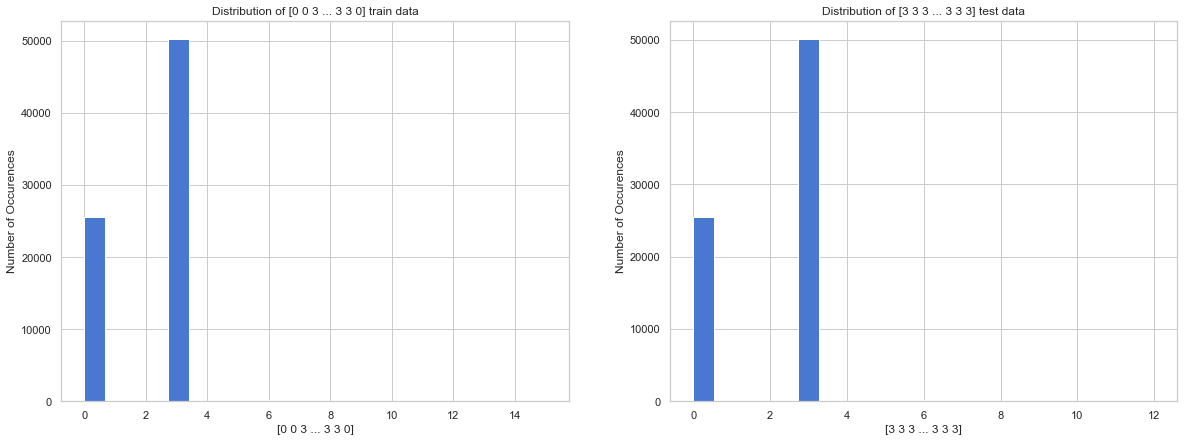

In [128]:
var=train_data['num_var5'].values
variable = test_data['num_var5'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

The variable num_var5 has most of its values as "zero" and "three" with highest and second highest frequency

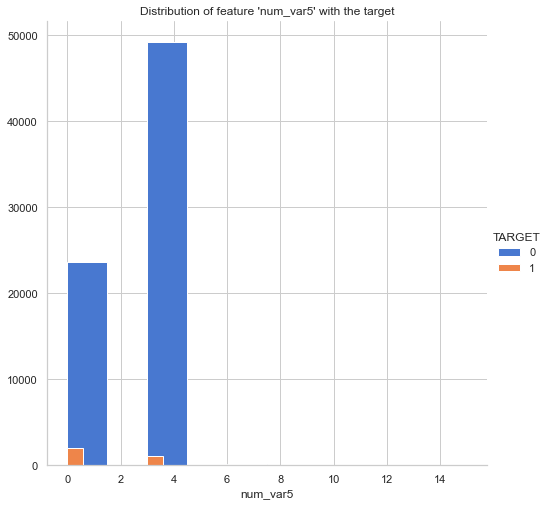

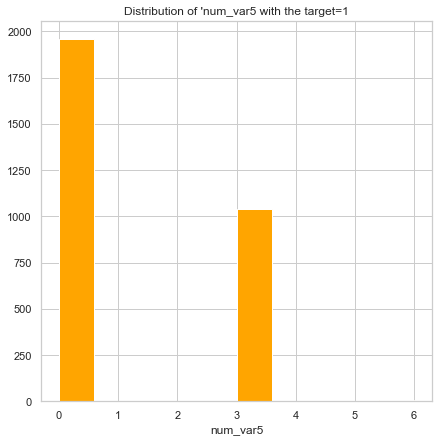

In [129]:
#Now, plotting the train and test distribution with target
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var5').add_legend()
plt.title("Distribution of feature 'num_var5' with the target")
plt.show()
mask = train_data[(train_data['TARGET']==1)]
plt.figure(figsize=(7,7))
plt.hist(mask['num_var5'],color='orange')
plt.title("Distribution of 'num_var5 with the target=1")
plt.xlabel('num_var5')
plt.show()

max_value = mask['num_var5'].max()
min_value = mask['num_var5'].min()

From the above plot, it can be seen that most of the customers are satisified with respect to feature num_var5

From the above we can see that there are 5 unique values for num_var5 and it is a categorical feature therefore.
The highest occurence is of value '3' followed by value '0'
The lowest occurence is of value '15 in train-data and it doesnt even occur in the test data.


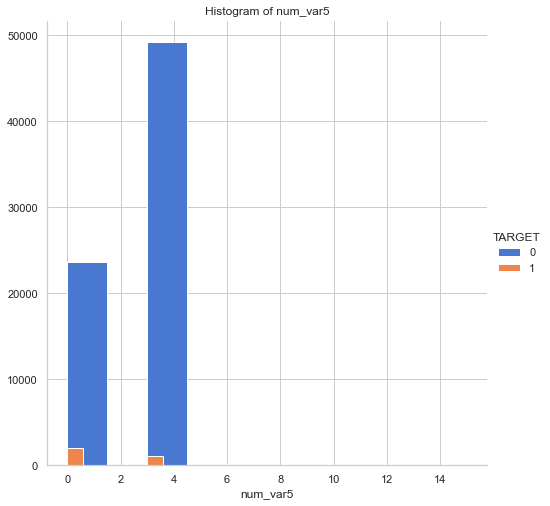

Percentage of dis-satisfied consumers wen 'num_var5'==0 is 7.664%
Percentage of dis-satisfied consumers wen 'num_var5'==3 is 2.073%
Percentage of dis-satisfied consumers wen 'num_var5'==6 is 3.684%
Percentage of dis-satisfied consumers wen 'num_var5'==9 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var5'==15 is 0.000%


In [130]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var5').add_legend()
plt.title('Histogram of %s'%('num_var5'))
plt.show()
for i in train_data['num_var5'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var5',i,train_data[(train_data['TARGET']==1)&(train_data['num_var5']==i)]['num_var5'].shape[0]*100/\
       train_data[train_data['num_var5']==i].shape[0]))

# Analysis of features with key-words

In [120]:
#for columns in train_data.columns:
    #print(columns)

In [69]:
feature_keywords = {colu.split('_')[0] for colu in train_data.columns if (len(colu.split('_'))>1)}
print(feature_keywords)
print(len(feature_keywords))

{'ind', 'num', 'saldo', 'imp', 'delta'}
5


In [70]:
#Now, count the number of each keyword feature that exists in dataset
feat_keywords = dict(zip(feature_keywords,np.zeros(len(feature_keywords),dtype=int)))
for key in feat_keywords.keys():
    for colu in train_data.columns:
        if key in colu:   # if key exists in columns of train_data.columns
            feat_keywords[key]+=1
feat_keywords

{'ind': 75, 'num': 155, 'saldo': 71, 'imp': 63, 'delta': 26}

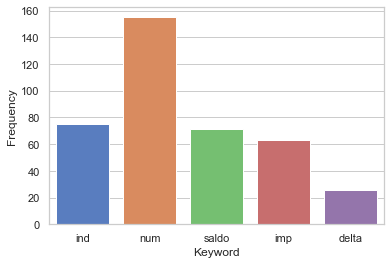

In [72]:
tt = pd.Series(feat_keywords)
sns.barplot(x=tt.index,y=tt.values)

plt.ylabel('Frequency')
plt.xlabel('Keyword')
plt.savefig('E:/distri_keywords.png')  
plt.show()


From the above bar chart, we can observe that the maximum number of features exist with "num" keyword followed by "ind"
 and then "saldo" and lastly by "imp"

In [121]:
# Features with saldo sub-string are:
saldo = [colu for colu in train_data.columns if 'saldo' in colu]
print("Number of features with saldo keyword are: %i"%(len(saldo)))
#saldo

Number of features with saldo keyword are: 71


In [122]:
# Features with imp sub-string are:
imp = [colu for colu in train_data.columns if 'imp' in colu]
print("Number of features with imp keyword are: %i"%(len(imp)))
#imp

Number of features with imp keyword are: 63


In [123]:
# Features with imp sub-string are:
ind = [colu for colu in train_data.columns if 'ind' in colu]
print("Number of features with ind keyword are: %i"%(len(ind)))
#ind

Number of features with ind keyword are: 75


In [124]:
num = [col for col in train_data.columns if 'num' in col]
print("The number of features with num keyword are: %i"%(len(num)))
#num

The number of features with num keyword are: 155


From "saldo" keyword features, we take those 2 features which have the highest correlation with the "TARGET" from among all 
the saldo features

# First "saldo" feature: saldo_var26

In [136]:
max_value = train_data['saldo_var26'].max()
min_value = train_data['saldo_var26'].min()
print("The minimum value of feature-saldo_var26 is %i and maximum value of saldo_var26 is %i."%(min_value,max_value ))

The minimum value of feature-saldo_var26 is 0 and maximum value of saldo_var26 is 69756.


In [138]:
np.array(sorted(train_data.saldo_var26.unique()))  #getting all the unique values

array([0.000000e+00, 2.892000e+01, 2.916000e+01, ..., 4.919343e+04,
       5.709000e+04, 6.975672e+04])

In [139]:
len(np.array(sorted(train_data.saldo_var26.unique())))

1592

saldo_var26 seems to be a numerical feature as it has a large number of  miscellaneous values.

In [140]:
print("Percentage value counts(top 5) in the train data for '%s':"%('saldo_var26'))

print((train_data['saldo_var26'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('saldo_var26'))
    
print((train_data['saldo_var26'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('saldo_var26'))
    
print((test_data['saldo_var26'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('saldo_var26'))
    
print((test_data['saldo_var26'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'saldo_var26':
0.00       97.536175
1278.00     0.161800
1065.00     0.011839
761.64      0.011839
2700.00     0.010524
Name: saldo_var26, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'saldo_var26':
9119.28    0.001315
1022.40    0.001315
4728.66    0.001315
2704.56    0.001315
3305.73    0.001315
Name: saldo_var26, dtype: float64
Percentage value counts(top 5) in the test data for 'saldo_var26':
0.00       97.410905
1278.00     0.170144
639.00      0.013189
3000.00     0.011871
761.07      0.010552
Name: saldo_var26, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'saldo_var26':
769.80     0.001319
1183.29    0.001319
1449.00    0.001319
1096.53    0.001319
9225.00    0.001319
Name: saldo_var26, dtype: float64


From the above it can be seen that the value "0" occurs most frequently, i.e 97.5 percent of the times and all other values
have negligible presence in the daatset (i.e. even less than 1 percent)
so, basically saldo_var26 appears to be a meaning-less feature.

# Second "saldo" feature: saldo_var25

In [141]:
max_value = train_data['saldo_var25'].max()
min_value = train_data['saldo_var25'].min()
print("The minimum value of feature-saldo_var25 is %i and maximum value of saldo_var25 is %i."%(min_value,max_value ))

The minimum value of feature-saldo_var25 is 0 and maximum value of saldo_var25 is 69756.


In [142]:
np.array(sorted(train_data.saldo_var25.unique()))  #getting all the unique values

array([0.000000e+00, 2.892000e+01, 2.916000e+01, ..., 4.919343e+04,
       5.709000e+04, 6.975672e+04])

In [143]:
len(np.array(sorted(train_data.saldo_var25.unique())))  #getting all the unique values

1524

 Hence, saldo_var25 seems to be a numerical feature

In [144]:
print("Percentage value counts(top 5) in the train data for '%s':"%('saldo_var25'))

print((train_data['saldo_var25'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('saldo_var25'))
    
print((train_data['saldo_var25'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('saldo_var25'))
    
print((test_data['saldo_var25'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('saldo_var25'))
    
print((test_data['saldo_var25'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'saldo_var25':
0.00       97.636148
1278.00     0.161800
761.64      0.011839
1065.00     0.011839
2700.00     0.010524
Name: saldo_var25, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'saldo_var25':
311.16     0.001315
1786.17    0.001315
1949.04    0.001315
1384.56    0.001315
2814.00    0.001315
Name: saldo_var25, dtype: float64
Percentage value counts(top 5) in the test data for 'saldo_var25':
0.00       97.523016
1278.00     0.174101
639.00      0.013189
3000.00     0.011871
761.07      0.010552
Name: saldo_var25, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'saldo_var25':
2549.34    0.001319
2308.17    0.001319
1962.75    0.001319
1399.59    0.001319
66.60      0.001319
Name: saldo_var25, dtype: float64


From the above it can be seen that the value "0" occurs most frequently, i.e 97.5 percent of the times and all other values
have negligible presence in the daatset (i.e. even less than 1 percent)
so, basically saldo_var25 appears to be a meaning-less feature.

Also, saldo_var26 and saldo_var25 show similar characterisitics with most of its values as zero which depict that feature-names
are not randomly assigned. Two features with similar names are also similar in characteristics.

# Third "saldo" feature: Feature saldo_var30

In [145]:
max_value = train_data['saldo_var30'].max()
min_value = train_data['saldo_var30'].min()
print("The minimum value of feature-saldo_var30 is %i and maximum value of saldo_var30 is %i."%(min_value,max_value ))

The minimum value of feature-saldo_var30 is -4942 and maximum value of saldo_var30 is 3458077.


In [146]:
np.array(sorted(train_data.saldo_var25.unique()))  #getting all the unique values

array([0.000000e+00, 2.892000e+01, 2.916000e+01, ..., 4.919343e+04,
       5.709000e+04, 6.975672e+04])

In [147]:
len(np.array(sorted(train_data.saldo_var30.unique())))  #getting all the unique values

16940

 Hence, saldo_var30 seems to be a numerical feature

In [148]:
print("Percentage value counts(top 5) in the train data for '%s':"%('saldo_var30'))

print((train_data['saldo_var30'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('saldo_var30'))
    
print((train_data['saldo_var30'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('saldo_var30'))
    
print((test_data['saldo_var30'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('saldo_var30'))
    
print((test_data['saldo_var30'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'saldo_var30':
0.0     26.716654
3.0     24.059458
90.0     6.887661
30.0     2.108656
15.0     1.942910
Name: saldo_var30, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'saldo_var30':
2535.84      0.001315
143461.68    0.001315
499.02       0.001315
137.25       0.001315
2223.42      0.001315
Name: saldo_var30, dtype: float64
Percentage value counts(top 5) in the test data for 'saldo_var30':
0.0     26.603181
3.0     24.438788
90.0     6.958770
30.0     2.079981
15.0     1.996887
Name: saldo_var30, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'saldo_var30':
118937.58    0.001319
9022.98      0.001319
1596.63      0.001319
1270.20      0.001319
1237.80      0.001319
Name: saldo_var30, dtype: float64


The above analysis shows that the value 0 occurs most frequently followed by value 3 with a slight difference in percentage.
After that the value "90" occurs with 6 percent frequency followed by value "30" and lastly "15"

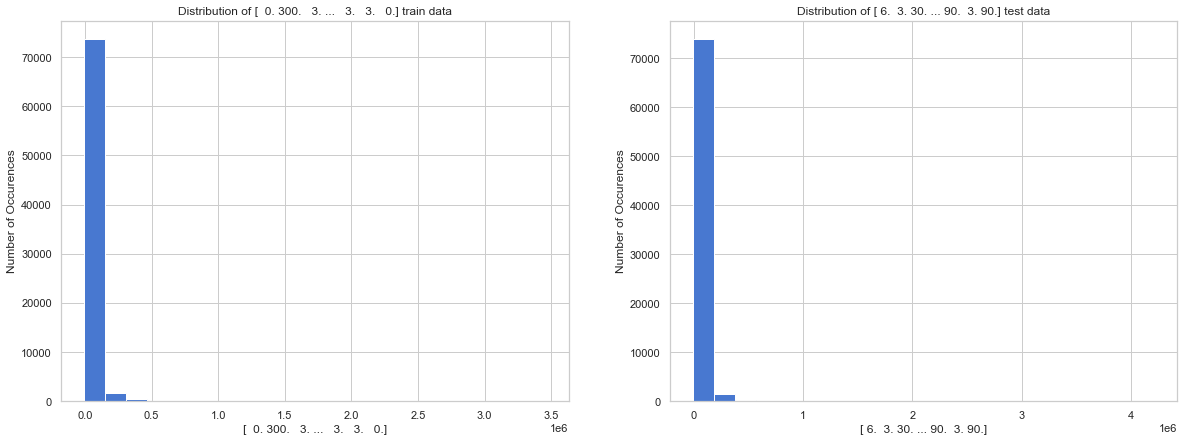

In [149]:
var=train_data['saldo_var30'].values
variable = test_data['saldo_var30'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

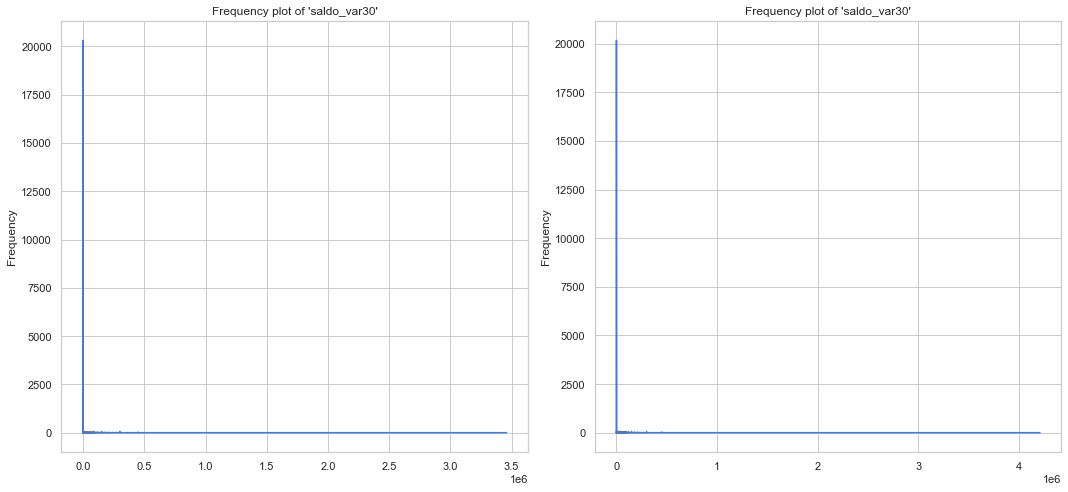

In [150]:
value_counting('saldo_var30',train_data,test_data)

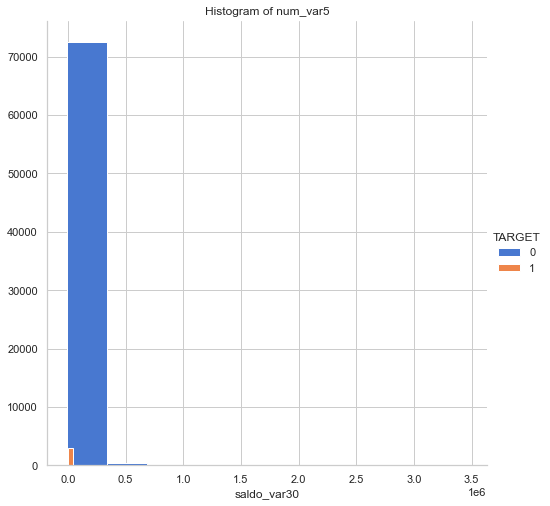

Percentage of dis-satisfied consumers wen 'saldo_var30'==0 is 8.794%
Percentage of dis-satisfied consumers wen 'saldo_var30'==3 is 1.750%
Percentage of dis-satisfied consumers wen 'saldo_var30'==6 is 2.376%
Percentage of dis-satisfied consumers wen 'saldo_var30'==9 is 3.922%
Percentage of dis-satisfied consumers wen 'saldo_var30'==15 is 2.640%


In [153]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'saldo_var30').add_legend()
plt.title('Histogram of %s'%('num_var5'))
plt.show()
for i in train_data['num_var5'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('saldo_var30',i,train_data[(train_data['TARGET']==1)&(train_data['saldo_var30']==i)]['saldo_var30'].shape[0]*100/\
       train_data[train_data['saldo_var30']==i].shape[0]))

 Thus, most customers are satisfied with respect to saldo_var30

# Next "saldo" feature: saldo_var42

In [154]:
max_value = train_data['saldo_var42'].max()
min_value = train_data['saldo_var42'].min()
print("The minimum value of feature-saldo_var42 is %i and maximum value of saldo_var42 is %i."%(min_value,max_value ))

The minimum value of feature-saldo_var42 is -4942 and maximum value of saldo_var42 is 3008077.


In [155]:
len(np.array(sorted(train_data.saldo_var42.unique())))  #getting all the unique values

15730

Thus, saldo_var42 is a numerical feature

In [156]:
print("Percentage value counts(top 5) in the train data for '%s':"%('saldo_var42'))

print((train_data['saldo_var42'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('saldo_var42'))
    
print((train_data['saldo_var42'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('saldo_var42'))
    
print((test_data['saldo_var42'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('saldo_var42'))
    
print((test_data['saldo_var42'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'saldo_var42':
0.0     28.658248
3.0     24.458037
90.0     6.912655
30.0     2.317811
15.0     2.109971
Name: saldo_var42, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'saldo_var42':
257.85     0.001315
900.30     0.001315
2986.53    0.001315
526.59     0.001315
111.12     0.001315
Name: saldo_var42, dtype: float64
Percentage value counts(top 5) in the test data for 'saldo_var42':
0.0     28.668654
3.0     24.800179
90.0     6.981192
30.0     2.271228
15.0     2.147247
Name: saldo_var42, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'saldo_var42':
84.33       0.001319
350.01      0.001319
72191.34    0.001319
626.88      0.001319
38654.28    0.001319
Name: saldo_var42, dtype: float64


Now, saldo_var30 and saldo_var42 show similar characterisitics with most of its values as zero  and three which depict that 
feature-names are not randomly assigned. Two features with similar names are also similar in characterisitcs.
 Thus, saldo_var42 is not further analysed as it seems v.similar to saldo_var30 itself

# Features with keyword "ind"
Those two features with ind keyword are being analysed which have the highest correlation with the TARGET feature

# First feature with keyword "ind" :: ind_var8_0

In [157]:
max_value = train_data['ind_var8_0'].max()
min_value = train_data['ind_var8_0'].min()
print("The minimum value of feature ind_var8_0 is %i and maximum value of ind_var8_0 is %i."%(min_value,max_value ))

The minimum value of feature ind_var8_0 is 0 and maximum value of ind_var8_0 is 1.


In [158]:
np.array(sorted(train_data.ind_var8_0.unique()))  #getting all the unique values

array([0, 1], dtype=int64)

In [159]:
len(np.array(sorted(train_data.ind_var8_0.unique())))

2

Thus, ind_var8_0 is a categorical feature with only 2 categories, i.e. 0 and 1

In [161]:
print("Percentage value counts(top 5) in the train data for '%s':"%('ind_var8_0'))

print((train_data['ind_var8_0'].value_counts()*100/train_data.shape[0]).iloc[:5])

print("Percentage value counts(top 5) in the test data for '%s':"%('ind_var8_0'))
    
print((test_data['ind_var8_0'].value_counts()*100/test_data.shape[0]).iloc[:5])

Percentage value counts(top 5) in the train data for 'ind_var8_0':
0    96.716654
1     3.283346
Name: ind_var8_0, dtype: float64
Percentage value counts(top 5) in the test data for 'ind_var8_0':
0    96.631407
1     3.368593
Name: ind_var8_0, dtype: float64


 We can observe that most of the values are 0 (96%) and just 3 percent of the values are 1

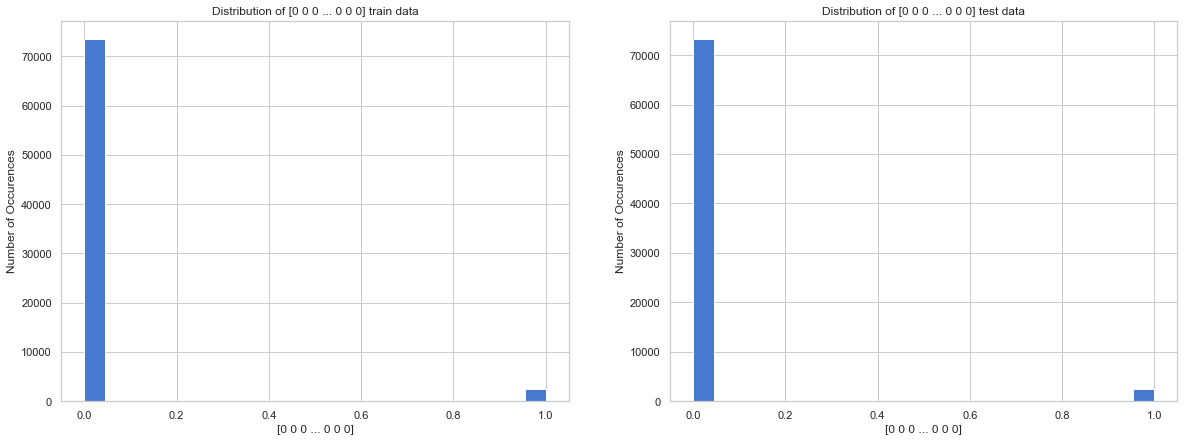

In [162]:
var=train_data['ind_var8_0'].values
variable = test_data['ind_var8_0'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

 Thus, the bar chart is showing that maximum values are "zero" and very few values are "1"

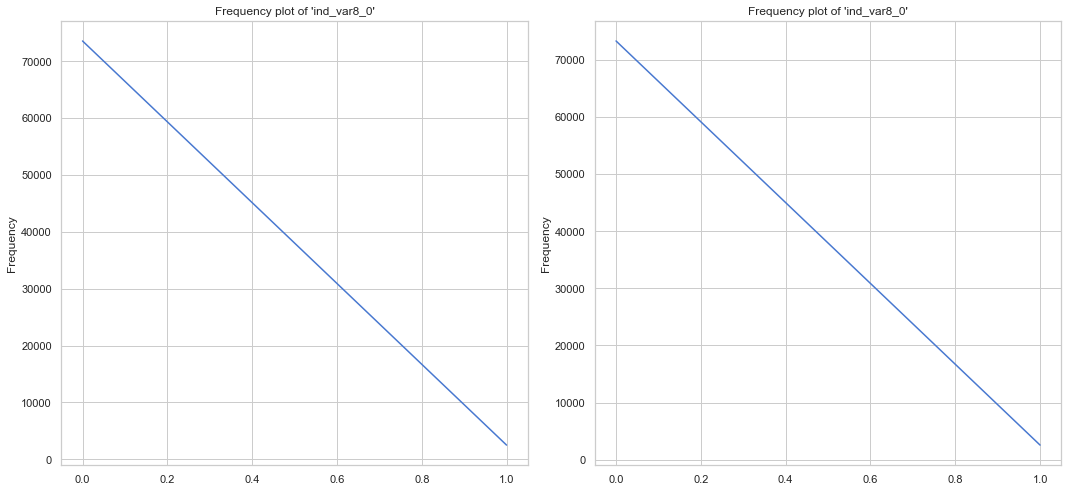

In [163]:
value_counting('ind_var8_0',train_data,test_data)

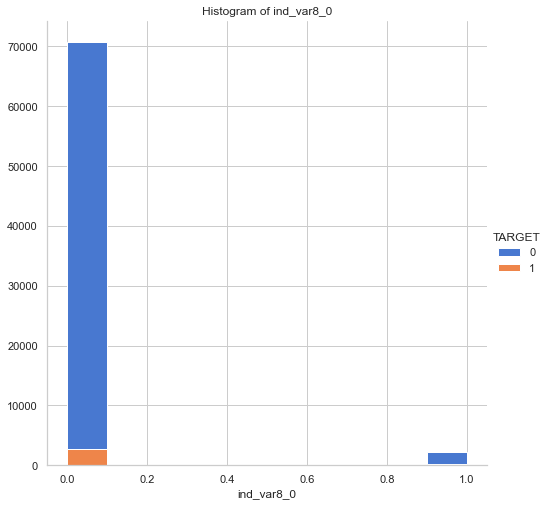

Percentage of dis-satisfied consumers wen 'ind_var8_0'==0 is 3.789%
Percentage of dis-satisfied consumers wen 'ind_var8_0'==1 is 8.894%


In [164]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'ind_var8_0').add_legend()
plt.title('Histogram of %s'%('ind_var8_0'))
plt.show()
for i in train_data['ind_var8_0'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('ind_var8_0',i,train_data[(train_data['TARGET']==1)&(train_data['ind_var8_0']==i)]['ind_var8_0'].shape[0]*100/\
       train_data[train_data['ind_var8_0']==i].shape[0]))

 So, the number of dis-satisified customers is very low whther ind_var8_0 is zero or 1

# Next Feature with "ind" keyword: ind_var8

In [169]:
max_value = train_data['ind_var8'].max()
min_value = train_data['ind_var8'].min()
print("The minimum value of feature ind_var8 is %i and maximum value of ind_var8 is %i."%(min_value,max_value ))

The minimum value of feature ind_var8 is 0 and maximum value of ind_var8 is 1.


In [170]:
print("Percentage value counts(top 5) in the train data for '%s':"%('ind_var8'))

print((train_data['ind_var8'].value_counts()*100/train_data.shape[0]).iloc[:5])

print("Percentage value counts(top 5) in the test data for '%s':"%('ind_var8'))
    
print((test_data['ind_var8'].value_counts()*100/test_data.shape[0]).iloc[:5])

Percentage value counts(top 5) in the train data for 'ind_var8':
0    97.140226
1     2.859774
Name: ind_var8, dtype: float64
Percentage value counts(top 5) in the test data for 'ind_var8':
0    97.011264
1     2.988736
Name: ind_var8, dtype: float64


 Again this feature seems similar to ind_var8_0....so we dont analyze it further

# Next  feature with keyword "ind" : ind_var30

In [171]:
max_value = train_data['ind_var30'].max()
min_value = train_data['ind_var30'].min()
print("The minimum value of feature ind_var30 is %i and maximum value of ind_var30 is %i."%(min_value,max_value ))

The minimum value of feature ind_var30 is 0 and maximum value of ind_var30 is 1.


In [173]:
len(np.array(sorted(train_data.ind_var30.unique())))

2

In [172]:
print("Percentage value counts(top 5) in the train data for '%s':"%('ind_var30'))

print((train_data['ind_var30'].value_counts()*100/train_data.shape[0]).iloc[:5])

print("Percentage value counts(top 5) in the test data for '%s':"%('ind_var30'))
    
print((test_data['ind_var30'].value_counts()*100/test_data.shape[0]).iloc[:5])

Percentage value counts(top 5) in the train data for 'ind_var30':
1    73.283346
0    26.716654
Name: ind_var30, dtype: float64
Percentage value counts(top 5) in the test data for 'ind_var30':
1    73.396819
0    26.603181
Name: ind_var30, dtype: float64


This feature though seems similar to other "ind" keyword features analysed earlier because it has two values only (i.e. 0 & 1)

 The difference seems here where value 1 occurs 73 percent of the times and zero occurs 26 percent of the times

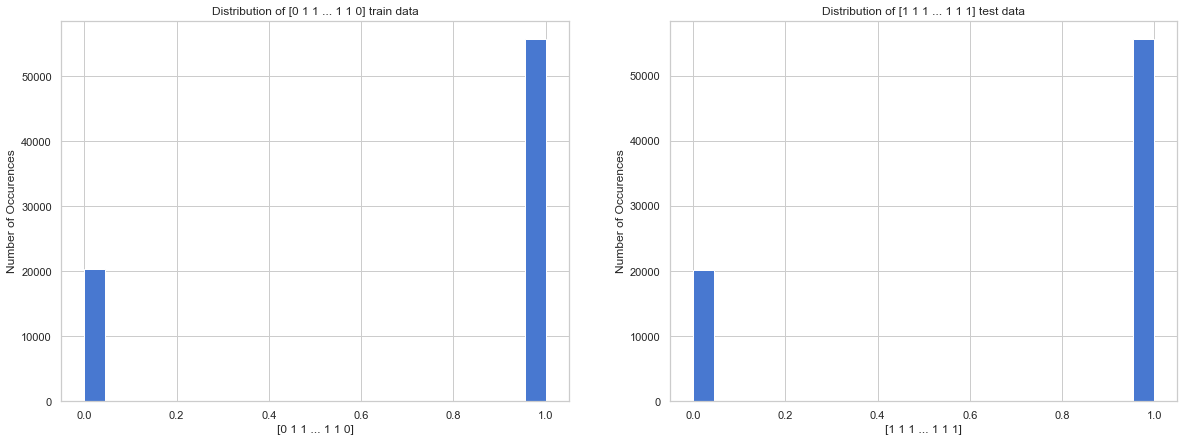

In [174]:
var=train_data['ind_var30'].values
variable = test_data['ind_var30'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

 Thus, the above plot depicting that value 1 occuring most of the times and zero occuring one-fourth of its times

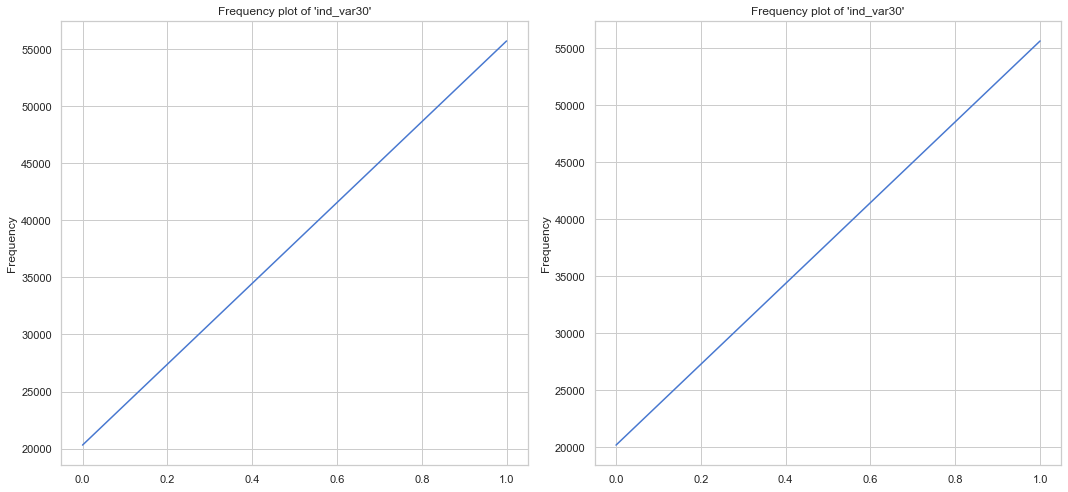

In [175]:
value_counting('ind_var30',train_data,test_data)

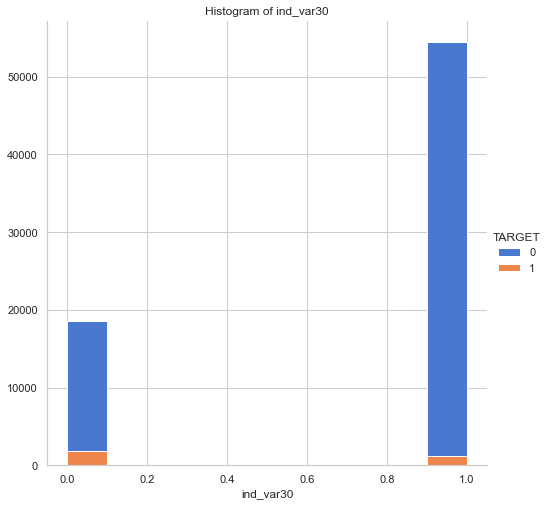

Percentage of dis-satisfied consumers wen 'ind_var8_0'==0 is 8.794%
Percentage of dis-satisfied consumers wen 'ind_var8_0'==1 is 2.194%


In [176]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'ind_var30').add_legend()
plt.title('Histogram of %s'%('ind_var30'))
plt.show()
for i in train_data['ind_var30'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('ind_var8_0',i,train_data[(train_data['TARGET']==1)&(train_data['ind_var30']==i)]['ind_var30'].shape[0]*100/\
       train_data[train_data['ind_var30']==i].shape[0]))

There seems to be more satisfied customers when ind_var30 = 1 as compared to when it is zero

# Features with keyword "imp"

# Next feature with "imp" keyword: imp_op_var39_efect_ult1
 this feature has highest correlation with target variable y amongst  all other features with the "imp" keyword

In [92]:
max_value = train_data['imp_op_var39_efect_ult1'].max()
min_value = train_data['imp_op_var39_efect_ult1'].min()
print("The minimum value of feature imp_op_var39_efect_ult1 is %i and maximum value of imp_op_var39_efect_ult1 is %i."%(min_value,max_value ))

The minimum value of feature imp_op_var39_efect_ult1 is 0 and maximum value of imp_op_var39_efect_ult1 is 45990.


In [97]:
len(np.array(sorted(train_data.imp_op_var39_efect_ult1.unique())))

336

In [99]:
#np.array(sorted(train_data.imp_op_var39_efect_ult1.unique()))

Thus, imp_op_var39_efect_ult1 is a numerical feature

In [100]:
print("Percentage value counts(top 5) in the train data for '%s':"%('imp_op_var39_efect_ult1'))

print((train_data['imp_op_var39_efect_ult1'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('imp_op_var39_efect_ult1'))
    
print((train_data['imp_op_var39_efect_ult1'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('imp_op_var39_efect_ult1'))
    
print((test_data['imp_op_var39_efect_ult1'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('imp_op_var39_efect_ult1'))
    
print((test_data['imp_op_var39_efect_ult1'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'imp_op_var39_efect_ult1':
0.0      91.193107
60.0      1.479874
120.0     0.845830
180.0     0.386740
240.0     0.340700
Name: imp_op_var39_efect_ult1, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'imp_op_var39_efect_ult1':
486.00     0.001315
6750.00    0.001315
4686.00    0.001315
2022.39    0.001315
354.00     0.001315
Name: imp_op_var39_efect_ult1, dtype: float64
Percentage value counts(top 5) in the test data for 'imp_op_var39_efect_ult1':
0.0      91.284392
60.0      1.367749
120.0     0.861273
180.0     0.431296
300.0     0.348202
Name: imp_op_var39_efect_ult1, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'imp_op_var39_efect_ult1':
384.93     0.001319
8130.00    0.001319
187.47     0.001319
546.00     0.001319
2390.10    0.001319
Name: imp_op_var39_efect_ult1, dtype: float64


From the above it can be seen that the value "0" occurs 91 percent of the times, value 60 occurs 1 percent of the time
 followed by all other values which occur less than 1 percent of the time.

Hence, this feature doesnt seem to be very substantive as it comprises of 0s mostly and we move on to the next feature

# Next feature with keyword "imp":: imp_op_var41_efect_ult1

In [101]:
max_value = train_data['imp_op_var41_efect_ult1'].max()
min_value = train_data['imp_op_var41_efect_ult1'].min()
print("The minimum value of feature imp_op_var41_efect_ult1 is %i and maximum value of imp_op_var41_efect_ult1 is %i."%(min_value,max_value ))

The minimum value of feature imp_op_var41_efect_ult1 is 0 and maximum value of imp_op_var41_efect_ult1 is 45990.


In [102]:
len(np.array(sorted(train_data.imp_op_var41_efect_ult1.unique())))

331

In [106]:
#np.array(sorted(train_data.imp_op_var41_efect_ult1.unique()))

Hence imp_op_var41_efect_ult1 is a numerical feature

In [107]:
print("Percentage value counts(top 5) in the train data for '%s':"%('imp_op_var41_efect_ult1'))

print((train_data['imp_op_var41_efect_ult1'].value_counts()*100/train_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 only) in train data for '%s':"%('imp_op_var41_efect_ult1'))
    
print((train_data['imp_op_var41_efect_ult1'].value_counts()*100/train_data.shape[0]).iloc[-5:])

print("Percentage value counts(top 5) in the test data for '%s':"%('imp_op_var41_efect_ult1'))
    
print((test_data['imp_op_var41_efect_ult1'].value_counts()*100/test_data.shape[0]).iloc[:5])
    
print("Percentage value counts(bottom 5 ) in the test data for '%s':"%('imp_op_var41_efect_ult1'))
    
print((test_data['imp_op_var41_efect_ult1'].value_counts()*100/test_data.shape[0]).iloc[-5:])

Percentage value counts(top 5) in the train data for 'imp_op_var41_efect_ult1':
0.0      91.207577
60.0      1.478558
120.0     0.847145
180.0     0.386740
240.0     0.340700
Name: imp_op_var41_efect_ult1, dtype: float64
Percentage value counts(bottom 5 only) in train data for 'imp_op_var41_efect_ult1':
4686.00    0.001315
2022.39    0.001315
554.58     0.001315
2485.35    0.001315
9000.00    0.001315
Name: imp_op_var41_efect_ult1, dtype: float64
Percentage value counts(top 5) in the test data for 'imp_op_var41_efect_ult1':
0.0      91.297581
60.0      1.365111
120.0     0.861273
180.0     0.432615
300.0     0.346883
Name: imp_op_var41_efect_ult1, dtype: float64
Percentage value counts(bottom 5 ) in the test data for 'imp_op_var41_efect_ult1':
471.75      0.001319
10380.00    0.001319
4470.00     0.001319
756.84      0.001319
78.00       0.001319
Name: imp_op_var41_efect_ult1, dtype: float64


 Again, the feature imp_op_var41_efect_ult1 seems very similar to imp_op_var39_efect_ult1 which we analyzed above. So, we
 dont proceed further with the analysis of this very feature

# Features with keyword "num"

# Feature with keyword "num" :: num_var8_0
 This feature called num_var8_0 has the highest correlation with target feature "y" amongst all other features with keyword "num".

In [126]:
max_value = train_data['num_var8_0'].max()
min_value = train_data['num_var8_0'].min()
print("The minimum value of feature num_var8_0 is %i and maximum value of num_var8_0 is %i."%(min_value,max_value ))

The minimum value of feature num_var8_0 is 0 and maximum value of num_var8_0 is 6.


In [127]:
len(np.array(sorted(train_data.num_var8_0.unique())))

3

In [128]:
np.array(sorted(train_data.num_var8_0.unique()))

array([0, 3, 6], dtype=int64)

Hence, num_var8_0 is a categorical feature with only 3 categories

In [130]:
print("Percentage value counts(top 5) in the train data for '%s':"%('num_var8_0'))

print((train_data['num_var8_0'].value_counts()*100/train_data.shape[0]).iloc[:3])

print("Percentage value counts(top 5) in the test data for '%s':"%('num_var8_0'))
    
print((test_data['num_var8_0'].value_counts()*100/test_data.shape[0]).iloc[:3])

Percentage value counts(top 5) in the train data for 'num_var8_0':
0    96.716654
3     3.282031
6     0.001315
Name: num_var8_0, dtype: float64
Percentage value counts(top 5) in the test data for 'num_var8_0':
0    96.631407
3     3.367274
6     0.001319
Name: num_var8_0, dtype: float64


Thus, it can be seen that in num_var8_0, maximum occurence is of value 0 (96%) followed by value 3 and lastly by value 6

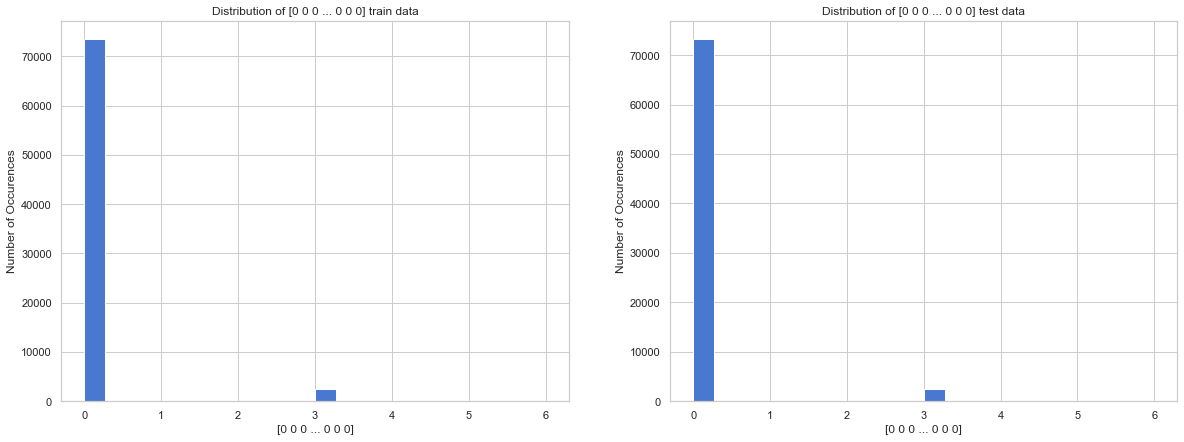

In [131]:
var=train_data['num_var8_0'].values
variable = test_data['num_var8_0'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

The bar chart clearly shows that maximum occurence is of value 0 followed by value 3 and value 6 has negligible presence only

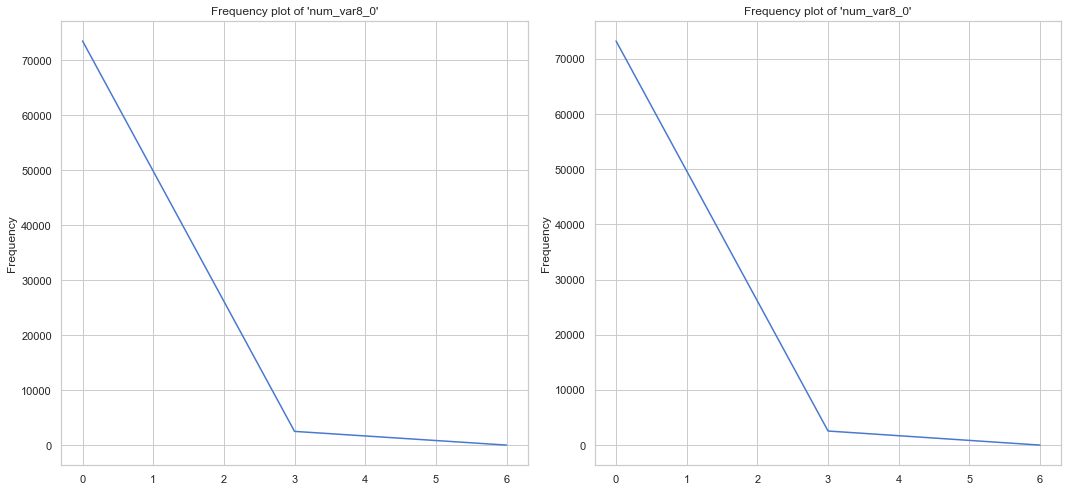

In [132]:
value_counting('num_var8_0',train_data,test_data)

 The frequency curve above has three distinct points, i.e. 0, 3 and 6
 Maximum height is at value 0 depicting its highest occurence, followed by value 3 and lastly by value 6

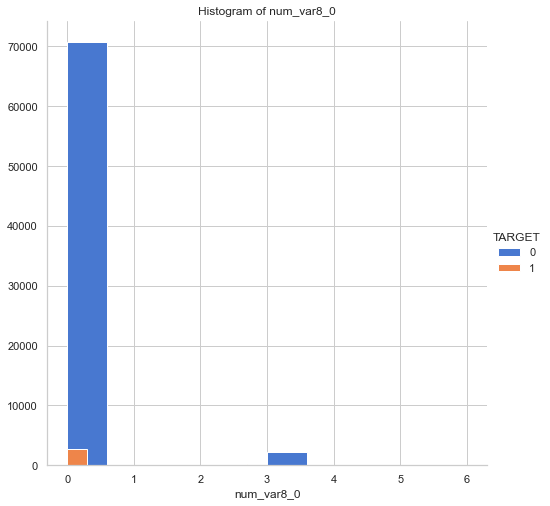

Percentage of dis-satisfied consumers wen 'num_var8_0'==0 is 3.789%
Percentage of dis-satisfied consumers wen 'num_var8_0'==3 is 8.898%
Percentage of dis-satisfied consumers wen 'num_var8_0'==6 is 0.000%


In [133]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var8_0').add_legend()
plt.title('Histogram of %s'%('num_var8_0'))
plt.show()
for i in train_data['num_var8_0'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var8_0',i,train_data[(train_data['TARGET']==1)&(train_data['num_var8_0']==i)]['num_var8_0'].shape[0]*100/\
       train_data[train_data['num_var8_0']==i].shape[0]))

 From  the above it can be seen that maximum percentage of satisfied customers is found with num_var8_0 value = 6
 Second highest satisfied customers is found with num_var8_0 value as 0 and lastly by 3

# Next feature with keyword "num" :: num_var8

In [134]:
max_value = train_data['num_var8'].max()
min_value = train_data['num_var8'].min()
print("The minimum value of feature num_var8 is %i and maximum value of num_var8 is %i."%(min_value,max_value ))

The minimum value of feature num_var8 is 0 and maximum value of num_var8 is 3.


In [135]:
len(np.array(sorted(train_data.num_var8.unique())))

2

In [136]:
np.array(sorted(train_data.num_var8.unique()))

array([0, 3], dtype=int64)

Thus, num_var8 is a categorical feature with 2 values, i.e. 0 and 3

In [137]:
print("Percentage value counts(top 5) in the train data for '%s':"%('num_var8'))

print((train_data['num_var8'].value_counts()*100/train_data.shape[0]).iloc[:3])

print("Percentage value counts(top 5) in the test data for '%s':"%('num_var8'))
    
print((test_data['num_var8'].value_counts()*100/test_data.shape[0]).iloc[:3])

Percentage value counts(top 5) in the train data for 'num_var8':
0    97.140226
3     2.859774
Name: num_var8, dtype: float64
Percentage value counts(top 5) in the test data for 'num_var8':
0    97.011264
3     2.988736
Name: num_var8, dtype: float64


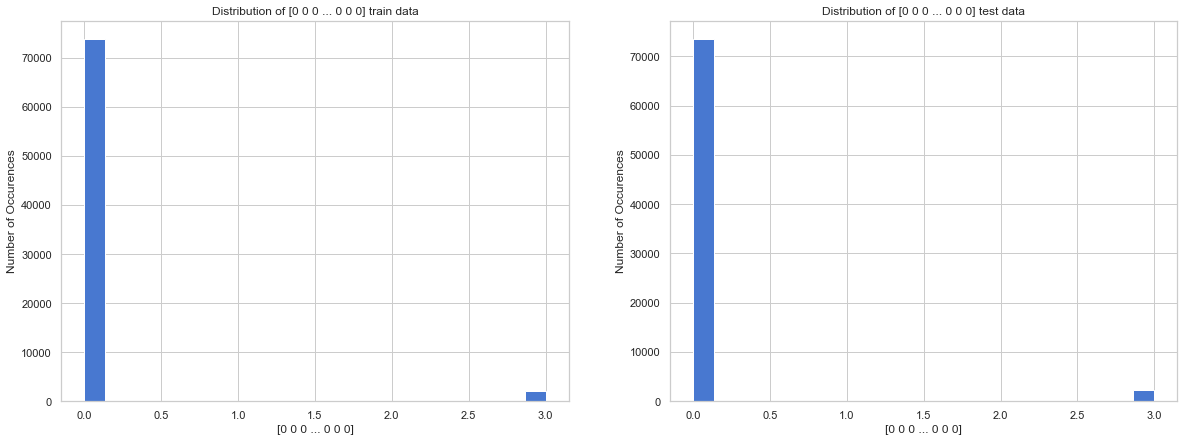

In [138]:
var=train_data['num_var8'].values
variable = test_data['num_var8'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

The above bar chart clearly shows how the occurence of value 0 far exceeds the value 3

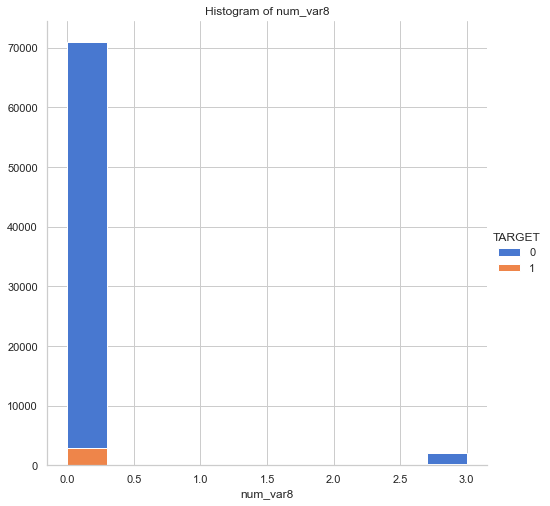

Percentage of dis-satisfied consumers wen 'num_var8'==0 is 3.863%
Percentage of dis-satisfied consumers wen 'num_var8'==3 is 7.130%


In [147]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var8').add_legend()
plt.title('Histogram of %s'%('num_var8'))
plt.show()
for i in train_data['num_var8'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var8',i,train_data[(train_data['TARGET']==1)&(train_data['num_var8']==i)]['num_var8'].shape[0]*100/\
       train_data[train_data['num_var8']==i].shape[0]))

# Next feature with keyword "num" :: num_var30

In [140]:
max_value = train_data['num_var30'].max()
min_value = train_data['num_var30'].min()
print("The minimum value of feature num_var30 is %i and maximum value of num_var30 is %i."%(min_value,max_value ))

The minimum value of feature num_var30 is 0 and maximum value of num_var30 is 33.


In [141]:
np.array(sorted(train_data.num_var30.unique()))

array([ 0,  3,  6,  9, 12, 15, 18, 21, 33], dtype=int64)

In [142]:
len(np.array(sorted(train_data.num_var30.unique())))

9

Thus, num_var30 is a categorical feature with 9 categories

In [144]:
print("Percentage value counts(top 5) in the train data for '%s':"%('num_var30'))

print((train_data['num_var30'].value_counts()*100/train_data.shape[0]).iloc[:4])

print("Percentage value counts(top 5) in the test data for '%s':"%('num_var30'))
    
print((test_data['num_var30'].value_counts()*100/test_data.shape[0]).iloc[:4])

Percentage value counts(top 5) in the train data for 'num_var30':
3    67.682189
0    26.716654
6     5.131544
9     0.419626
Name: num_var30, dtype: float64
Percentage value counts(top 5) in the test data for 'num_var30':
3    67.688412
0    26.603181
6     5.223034
9     0.431296
Name: num_var30, dtype: float64


From above we can see that maximum occurence is of value 3 followed by value 0 and then by value 5

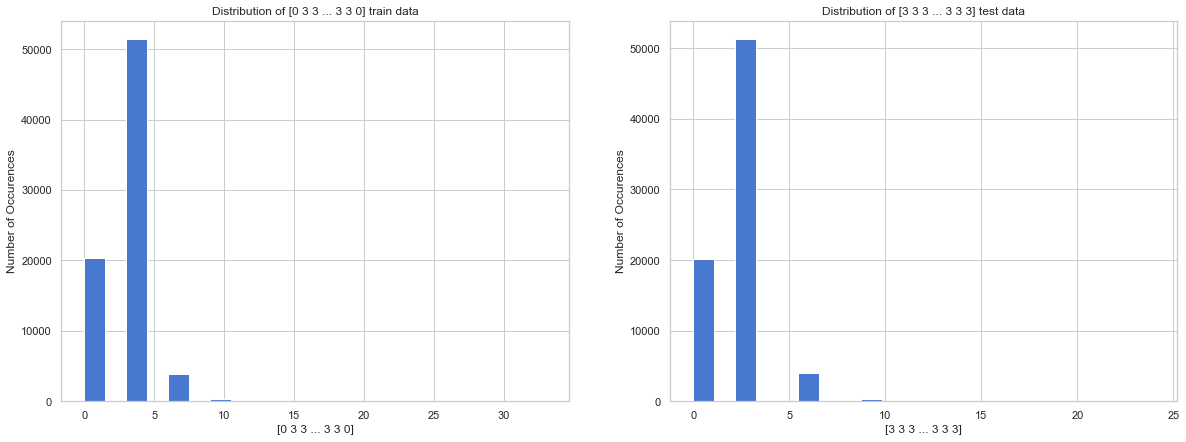

In [145]:
var=train_data['num_var30'].values
variable = test_data['num_var30'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

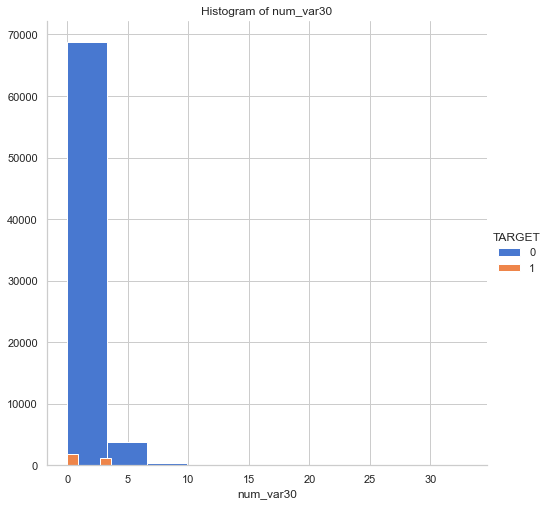

Percentage of dis-satisfied consumers wen 'num_var30'==0 is 8.794%
Percentage of dis-satisfied consumers wen 'num_var30'==3 is 2.291%
Percentage of dis-satisfied consumers wen 'num_var30'==6 is 1.051%
Percentage of dis-satisfied consumers wen 'num_var30'==9 is 0.627%
Percentage of dis-satisfied consumers wen 'num_var30'==12 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var30'==15 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var30'==18 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var30'==33 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var30'==21 is 0.000%


In [146]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var30').add_legend()
plt.title('Histogram of %s'%('num_var30'))
plt.show()
for i in train_data['num_var30'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var30',i,train_data[(train_data['TARGET']==1)&(train_data['num_var30']==i)]['num_var30'].shape[0]*100/\
       train_data[train_data['num_var30']==i].shape[0]))

# Feature with keyword "num" :: num_var35

In [148]:
max_value = train_data['num_var35'].max()
min_value = train_data['num_var35'].min()
print("The minimum value of feature num_var35 is %i and maximum value of num_var35 is %i."%(min_value,max_value ))

The minimum value of feature num_var35 is 0 and maximum value of num_var35 is 36.


In [149]:
np.array(sorted(train_data.num_var35.unique()))

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36], dtype=int64)

In [150]:
len(np.array(sorted(train_data.num_var35.unique())))

13

Thus, num_var35 is a categorical feature with 13 categories in total

In [152]:
print("Percentage value counts(top 5) in the train data for '%s':"%('num_var35'))

print((train_data['num_var35'].value_counts()*100/train_data.shape[0]).iloc[:6])

print("Percentage value counts(top 5) in the test data for '%s':"%('num_var35'))
    
print((test_data['num_var35'].value_counts()*100/test_data.shape[0]).iloc[:6])

Percentage value counts(top 5) in the train data for 'num_var35':
3     49.882926
0     25.687977
6     16.215470
9      6.011576
12     1.627203
15     0.420942
Name: num_var35, dtype: float64
Percentage value counts(top 5) in the test data for 'num_var35':
3     50.039568
0     25.582316
6     16.080614
9      6.034187
12     1.726503
15     0.378538
Name: num_var35, dtype: float64


Thus, maximum occurence is of value 3, followed by value 0, then by value 6 and 9 and 12 respectively

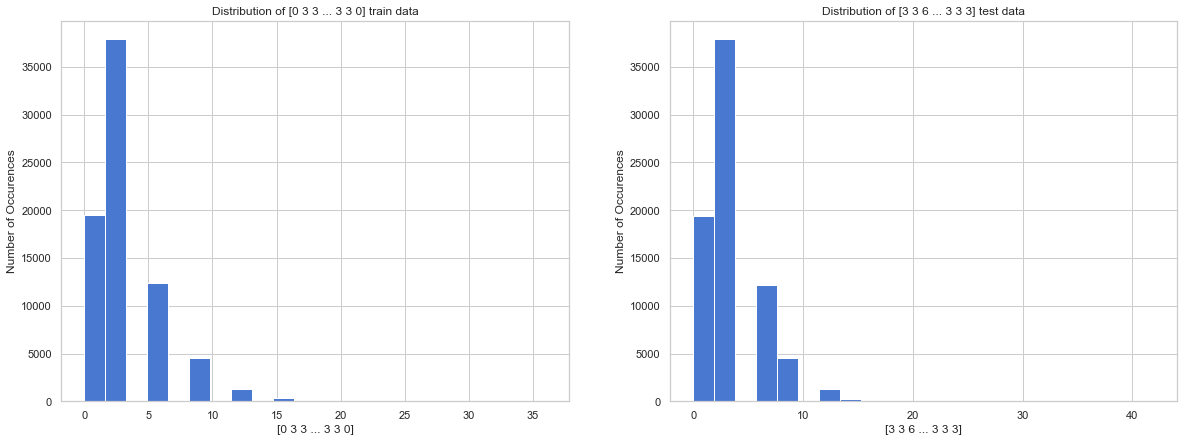

In [153]:
var=train_data['num_var35'].values
variable = test_data['num_var35'].values
plt.subplots(1,2,figsize=(20,7))
#plot the  train data
plt.subplot(121)
plt.title("Distribution of {} train data".format(var))
plt.ylabel('Number of Occurences')
plt.xlabel(var)
plt.hist([var],bins=22)
#plot the test data
plt.subplot(122)
plt.title("Distribution of {} test data".format(variable))
plt.ylabel('Number of Occurences')
plt.xlabel(variable)
plt.hist([variable],bins=22)
    
plt.show()
print("")

This feature seems to stand for something meaningful as each value depicts something and the top 3-4 values have a significant occurence in the train_data

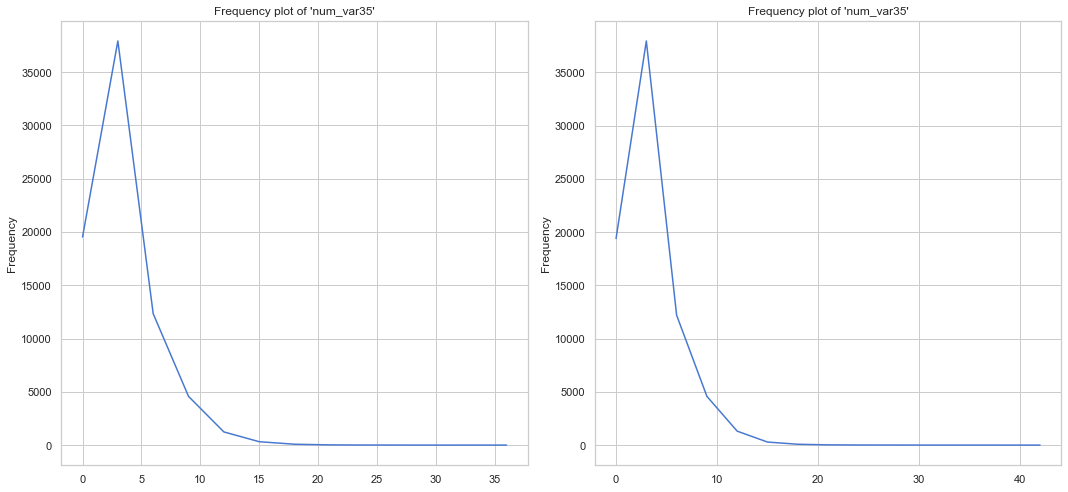

In [154]:
value_counting('num_var35',train_data,test_data)

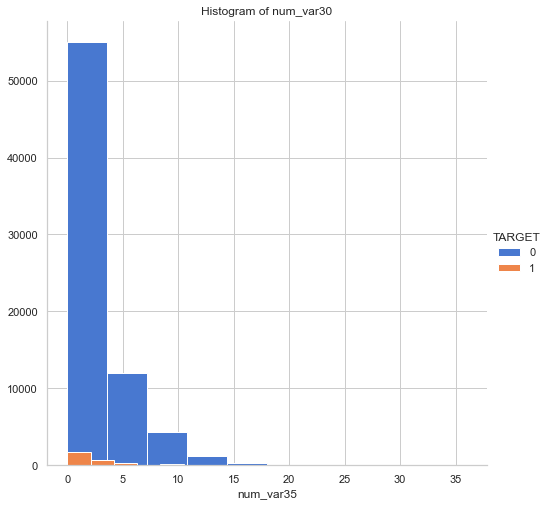

Percentage of dis-satisfied consumers wen 'num_var35'==0 is 8.895%
Percentage of dis-satisfied consumers wen 'num_var35'==3 is 1.814%
Percentage of dis-satisfied consumers wen 'num_var35'==9 is 4.092%
Percentage of dis-satisfied consumers wen 'num_var35'==6 is 2.572%
Percentage of dis-satisfied consumers wen 'num_var35'==12 is 5.174%
Percentage of dis-satisfied consumers wen 'num_var35'==15 is 3.750%
Percentage of dis-satisfied consumers wen 'num_var35'==18 is 1.220%
Percentage of dis-satisfied consumers wen 'num_var35'==21 is 10.526%
Percentage of dis-satisfied consumers wen 'num_var35'==24 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var35'==27 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var35'==36 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var35'==33 is 0.000%
Percentage of dis-satisfied consumers wen 'num_var35'==30 is 0.000%


In [155]:
sns.FacetGrid(data=train_data,hue='TARGET',height=7).map(plt.hist,'num_var35').add_legend()
plt.title('Histogram of %s'%('num_var30'))
plt.show()
for i in train_data['num_var35'].unique():
    print("Percentage of dis-satisfied consumers wen '%s'==%i is %.3f%%"%\
      ('num_var35',i,train_data[(train_data['TARGET']==1)&(train_data['num_var35']==i)]['num_var35'].shape[0]*100/\
       train_data[train_data['num_var35']==i].shape[0]))

 Thank you!!!